In [1]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np

matplotlib是一个用于创建出版质量图表的桌面绘图包（主要是2D方面）。该项目是由John Hunter于2002年启动的，其目的是为Python构建一个MATLAB式的绘图接口。matplotlib和IPython社区进行合作，简化了从IPython shell（包括现在的Jupyter notebook）进行交互式绘图。matplotlib支持各种操作系统上许多不同的GUI后端，而且还能将图片导出为各种常见的矢量（vector）和光栅（raster）图：PDF、SVG、JPG、PNG、BMP、GIF等。除了几张，本书中的大部分图都是用它生成的。

随着时间的发展，matplotlib衍生出了多个数据可视化的工具集，它们使用matplotlib作为底层。其中之一是seaborn（http://seaborn.pydata.org/），本章后面会学习它。

学习本章代码案例的最简单方法是在Jupyter notebook进行交互式绘图。在Jupyter notebook中执行下面的语句：

In [16]:
#%matplotlib notebook

### 9.1 matplotlib API入门
matplotlib的通常引入约定是：

In [3]:
import matplotlib.pyplot as plt

在Jupyter中运行%matplotlib notebook（或在IPython中运行%matplotlib），就可以创建一个简单的图形。如果一切设置正确，会看到图9-1：

In [4]:
import numpy as np
data = np.arange(10)
data

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

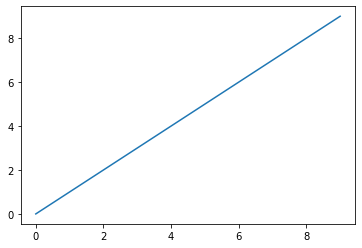

In [5]:
plt.plot(data)

虽然seaborn这样的库和pandas的内置绘图函数能够处理许多普通的绘图任务，但如果需要自定义一些高级功能的话就必须学习matplotlib API。

#### #Figure和Subplot
matplotlib的图像都位于Figure对象中。你可以用plt.figure创建一个新的Figure：

In [6]:
fig = plt.figure()

<Figure size 432x288 with 0 Axes>

如果用的是IPython，这时会弹出一个空窗口，但在Jupyter中，必须再输入更多命令才能看到。plt.figure有一些选项，特别是figsize，它用于确保当图片保存到磁盘时具有一定的大小和纵横比。

不能通过空Figure绘图。必须用add_subplot创建一个或多个subplot才行：

In [7]:
ax1 = fig.add_subplot(2, 2, 1)

这条代码的意思是：图像应该是2×2的（即最多4张图），且当前选中的是4个subplot中的第一个（编号从1开始）。如果再把后面两个subplot也创建出来，最终得到的图像如图9-2所示：

In [7]:
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)

这里，我们运行同一个小窗里的所有命令：

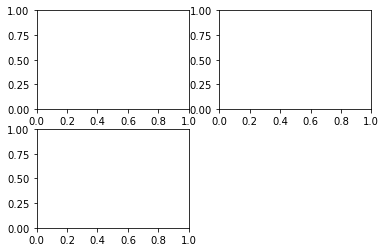

In [8]:
fig = plt.figure()
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)

如果这时执行一条绘图命令（如plt.plot([1.5, 3.5, -2, 1.6])），matplotlib就会在最后一个用过的subplot（如果没有则创建一个）上进行绘制，隐藏创建figure和subplot的过程。因此，如果我们执行下列命令，你就会得到如图9-3所示的结果：

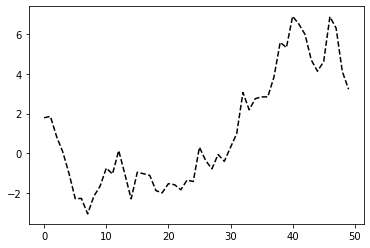

In [9]:
plt.plot(np.random.randn(50).cumsum(), 'k--')

"k--"是一个线型选项，用于告诉matplotlib绘制黑色虚线图。上面那些由fig.add_subplot所返回的对象是AxesSubplot对象，直接调用它们的实例方法就可以在其它空着的格子里面画图了，如图9-4所示：

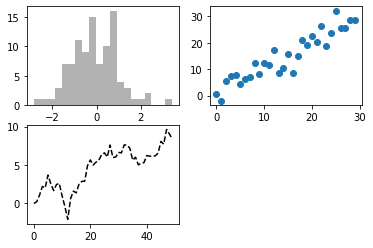

In [10]:
fig = plt.figure()
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
ax1.hist(np.random.randn(100), bins=20, color='k', alpha=0.3)
ax2.scatter(np.arange(30), np.arange(30) + 3 * np.random.randn(30))
ax3.plot(np.random.randn(50).cumsum(), 'k--')

你可以在matplotlib的文档中找到各种图表类型。

创建包含subplot网格的figure是一个非常常见的任务，matplotlib有一个更为方便的方法plt.subplots，它可以创建一个新的Figure，并返回一个含有已创建的subplot对象的NumPy数组：

array([[<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

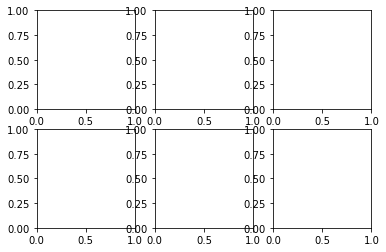

In [11]:
fig, axes = plt.subplots(2, 3)
axes

这是非常实用的，因为可以轻松地对axes数组进行索引，就好像是一个二维数组一样，例如axes[0,1]。你还可以通过sharex和sharey指定subplot应该具有相同的X轴或Y轴。在比较相同范围的数据时，这也是非常实用的，否则，matplotlib会自动缩放各图表的界限。有关该方法的更多信息，请参见表9-1。
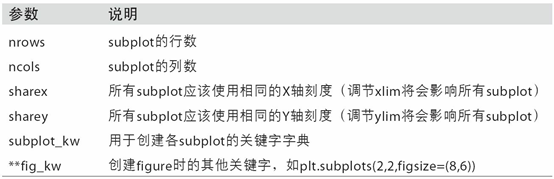

#### #调整subplot周围的间距
默认情况下，matplotlib会在subplot外围留下一定的边距，并在subplot之间留下一定的间距。间距跟图像的高度和宽度有关，因此，如果你调整了图像大小（不管是编程还是手工），间距也会自动调整。利用Figure的subplots_adjust方法可以轻而易举地修改间距，此外，它也是个顶级函数：

In [30]:
#subplots_adjust(left=None, bottom=None, right=None, top=None,wspace=None, hspace=None)

wspace和hspace用于控制宽度和高度的百分比，可以用作subplot之间的间距。下面是一个简单的例子，其中我将间距收缩到了0（如图9-5所示）：

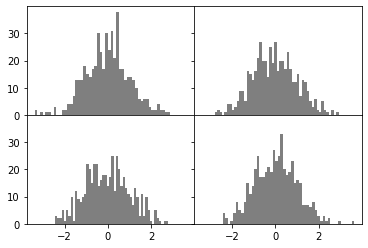

In [13]:
fig, axes = plt.subplots(2, 2, sharex=True, sharey=True)
for i in range(2):
    for j in range(2):
        axes[i, j].hist(np.random.randn(500), bins=50, color='k', alpha=0.5)
plt.subplots_adjust(wspace=0, hspace=0)

不难看出，其中的轴标签重叠了。matplotlib不会检查标签是否重叠，所以对于这种情况，你只能自己设定刻度位置和刻度标签。后面几节将会详细介绍该内容。
#### #颜色、标记和线型
matplotlib的plot函数接受一组X和Y坐标，还可以接受一个表示颜色和线型的字符串缩写。例如，要根据x和y绘制绿色虚线，你可以执行如下代码：

这种在一个字符串中指定颜色和线型的方式非常方便。在实际中，如果你是用代码绘图，你可能不想通过处理字符串来获得想要的格式。通过下面这种更为明确的方式也能得到同样的效果：

常用的颜色可以使用颜色缩写，你也可以指定颜色码（例如，'#CECECE'）。你可以通过查看plot的文档字符串查看所有线型的合集（在IPython和Jupyter中使用plot?）。

线图可以使用标记强调数据点。因为matplotlib可以创建连续线图，在点之间进行插值，因此有时可能不太容易看出真实数据点的位置。标记也可以放到格式字符串中，但标记类型和线型必须放在颜色后面（见图9-6）：

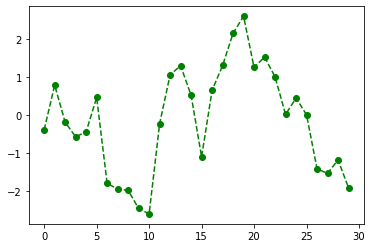

In [14]:
from numpy.random import randn
plt.plot(randn(30).cumsum(), 'ko--', color='g')

还可以将其写成更为明确的形式：

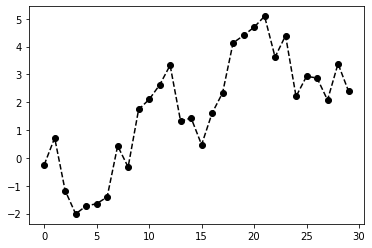

In [18]:
plt.plot(randn(30).cumsum(), color='k', linestyle='dashed', marker='o')

在线型图中，非实际数据点默认是按线性方式插值的。可以通过drawstyle选项修改（见图9-7）：

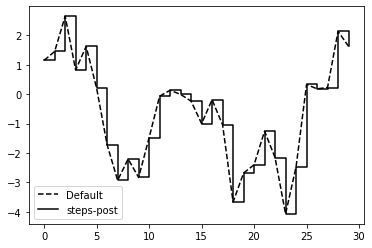

In [19]:
data = np.random.randn(30).cumsum()
plt.plot(data, 'k--', label='Default')
plt.plot(data, 'k-', drawstyle='steps-post', label='steps-post')
plt.legend(loc='best')

你可能注意到运行上面代码时有输出<matplotlib.lines.Line2D at ...>。matplotlib会返回引用了新添加的子组件的对象。大多数时候，你可以放心地忽略这些输出。这里，因为我们传递了label参数到plot，我们可以创建一个plot图例，指明每条使用plt.legend的线。

>笔记：你必须调用plt.legend（或使用ax.legend，如果引用了轴的话）来创建图例，无论你绘图时是否传递label标签选项。

#### #刻度、标签和图例

对于大多数的图表装饰项，其主要实现方式有二：使用过程型的pyplot接口（例如，matplotlib.pyplot）以及更为面向对象的原生matplotlib API。

pyplot接口的设计目的就是交互式使用，含有诸如xlim、xticks和xticklabels之类的方法。它们分别控制图表的范围、刻度位置、刻度标签等。其使用方式有以下两种：

- 调用时不带参数，则返回当前的参数值（例如，plt.xlim()返回当前的X轴绘图范围）。
- 调用时带参数，则设置参数值（例如，plt.xlim([0,10])会将X轴的范围设置为0到10）。

所有这些方法都是对当前或最近创建的AxesSubplot起作用的。它们各自对应subplot对象上的两个方法，以xlim为例，就是ax.get_xlim和ax.set_xlim。我更喜欢使用subplot的实例方法（因为我喜欢明确的事情，而且在处理多个subplot时这样也更清楚一些）。当然你完全可以选择自己觉得方便的那个。

#### #设置标题、轴标签、刻度以及刻度标签
为了说明自定义轴，我将创建一个简单的图像并绘制一段随机漫步（如图9-8所示）：

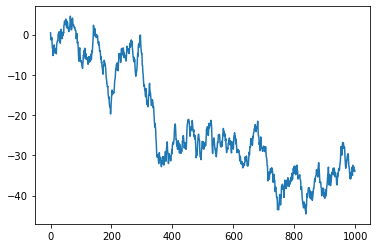

In [20]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(np.random.randn(1000).cumsum())

#### figure语法说明:相当于画布
figure(num=None, figsize=None, dpi=None, facecolor=None, edgecolor=None, frameon=True)

num:图像编号或名称，数字为编号 ，字符串为名称

figsize:指定figure的宽和高，单位为英寸；

dpi参数指定绘图对象的分辨率，即每英寸多少个像素，缺省值为80      1英寸等于2.5cm,A4纸是 21*30cm的纸张 

facecolor:背景颜色

edgecolor:边框颜色

frameon:是否显示边框

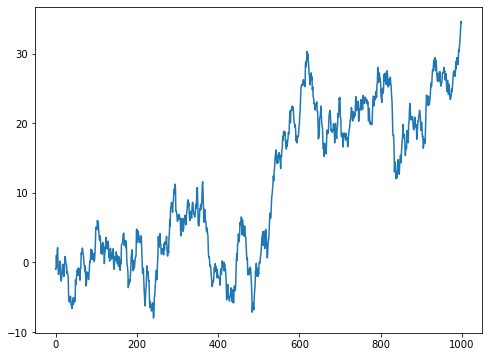

In [21]:
fig = plt.figure(figsize=(8,6))#增加画布大小
ax = fig.add_subplot(1, 1, 1)
ax.plot(np.random.randn(1000).cumsum())

要改变x轴刻度，最简单的办法是使用set_xticks和set_xticklabels。前者告诉matplotlib要将刻度放在数据范围中的哪些位置，默认情况下，这些位置也就是刻度标签。但我们可以通过set_xticklabels将任何其他的值用作标签：

rotation选项设定x刻度标签倾斜30度。最后，再用set_xlabel为X轴设置一个名称，并用set_title设置一个标题（见图9-9的结果）：

Text(0.5, 0, 'Stages')

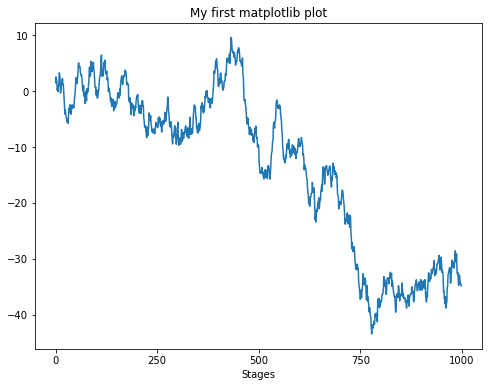

In [22]:
fig = plt.figure(figsize=(8,6))#增加画布大小
ax = fig.add_subplot(1, 1, 1)
ax.plot(np.random.randn(1000).cumsum())

ax.set_xticks([0, 250, 500, 750, 1000]) #改变x轴刻度
#ax.set_xticklabels(['one', 'two', 'three', 'four', 'five'],rotation=30, fontsize='small') #通过set_xticklabels将任何其他的值用作标签
ax.set_title('My first matplotlib plot') #用set_title设置一个标题
ax.set_xlabel('Stages') #为X轴设置一个名称

#### #添加图例
图例（legend）是另一种用于标识图表元素的重要工具。添加图例的方式有多种。最简单的是在添加subplot的时候传入label参数：

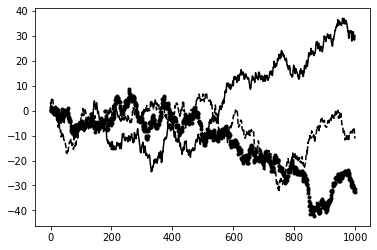

In [23]:
from numpy.random import randn
fig = plt.figure(); ax = fig.add_subplot(1, 1, 1)
ax.plot(randn(1000).cumsum(), 'k', label='one')
ax.plot(randn(1000).cumsum(), 'k--', label='two')
ax.plot(randn(1000).cumsum(), 'k.', label='three')

在此之后，你可以调用ax.legend()或plt.legend()来自动创建图例（结果见图9-10）：

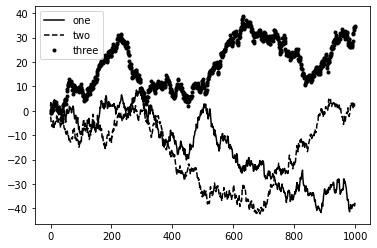

In [24]:
from numpy.random import randn
fig = plt.figure(); ax = fig.add_subplot(1, 1, 1)
ax.plot(randn(1000).cumsum(), 'k', label='one')
ax.plot(randn(1000).cumsum(), 'k--', label='two')
ax.plot(randn(1000).cumsum(), 'k.', label='three')
ax.legend(loc='best')

legend方法有几个其它的loc位置参数选项。请查看文档字符串（使用ax.legend?）。

loc告诉matplotlib要将图例放在哪。如果你不是吹毛求疵的话，"best"是不错的选择，因为它会选择最不碍事的位置。

#### #注解以及在Subplot上绘图
除标准的绘图类型，你可能还希望绘制一些子集的注解，可能是文本、箭头或其他图形等。注解和文字可以通过text、arrow和annotate函数进行添加。text可以将文本绘制在图表的指定坐标(x,y)，还可以加上一些自定义格式：

Text(900, 20, 'Hello world!')

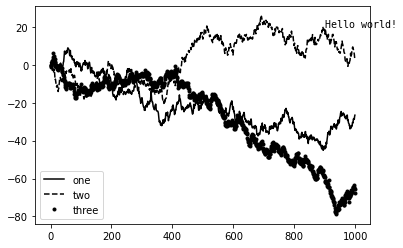

In [34]:
from numpy.random import randn
fig = plt.figure(); ax = fig.add_subplot(1, 1, 1)
ax.plot(randn(1000).cumsum(), 'k', label='one')
ax.plot(randn(1000).cumsum(), 'k--', label='two')
ax.plot(randn(1000).cumsum(), 'k.', label='three')
ax.legend(loc='best')
ax.text(900, 20, 'Hello world!',
        family='monospace', fontsize=10)

#### #将图表保存到文件
利用plt.savefig可以将当前图表保存到文件。该方法相当于Figure对象的实例方法savefig。例如，要将上面图表保存为SVG文件，你只需输入：

In [32]:
fig.savefig('figpath.svg')

文件类型是通过文件扩展名推断出来的。因此，如果你使用的是.pdf，就会得到一个PDF文件。我在发布图片时最常用到两个重要的选项是dpi（控制“每英寸点数”分辨率）和bbox_inches（可以剪除当前图表周围的空白部分）。要得到一张带有最小白边且分辨率为400DPI的PNG图片，你可以：

In [33]:
fig.savefig('figpath1.png', dpi=400, bbox_inches='tight')

表9-2列出了savefig的其它选项。
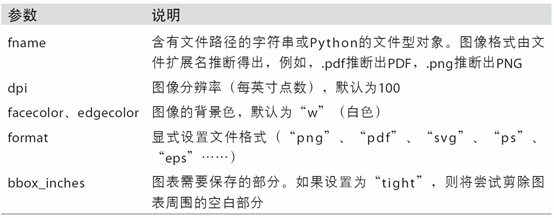

##### #matplotlib配置
matplotlib自带一些配色方案，以及为生成出版质量的图片而设定的默认配置信息。幸运的是，几乎所有默认行为都能通过一组全局参数进行自定义，它们可以管理图像大小、subplot边距、配色方案、字体大小、网格类型等。一种Python编程方式配置系统的方法是使用rc方法。例如，要将全局的图像默认大小设置为5×5，你可以执行：

In [35]:
plt.rc('figure', figsize=(5, 5))

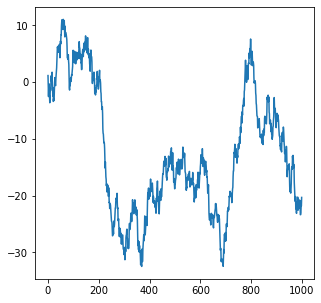

In [36]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(np.random.randn(1000).cumsum())

rc的第一个参数是希望自定义的对象，如'figure'、'axes'、'xtick'、'ytick'、'grid'、'legend'等。其后可以跟上一系列的关键字参数。一个简单的办法是将这些选项写成一个字典：

### 9.2 使用pandas和seaborn绘图
matplotlib实际上是一种比较低级的工具。要绘制一张图表，你组装一些基本组件就行：数据展示（即图表类型：线型图、柱状图、盒形图、散布图、等值线图等）、图例、标题、刻度标签以及其他注解型信息。

在pandas中，我们有多列数据，还有行和列标签。pandas自身就有内置的方法，用于简化从DataFrame和Series绘制图形。另一个库seaborn（https://seaborn.pydata.org/），由Michael Waskom创建的静态图形库。Seaborn简化了许多常见可视类型的创建。

>提示：引入seaborn会修改matplotlib默认的颜色方案和绘图类型，以提高可读性和美观度。即使你不使用seaborn API，你可能也会引入seaborn，作为提高美观度和绘制常见matplotlib图形的简化方法。

#### #线型图
Series和DataFrame都有一个用于生成各类图表的plot方法。默认情况下，它们所生成的是线型图（如图9-13所示）：

In [37]:
plt.rc('figure', figsize=(8, 6))

<AxesSubplot:>

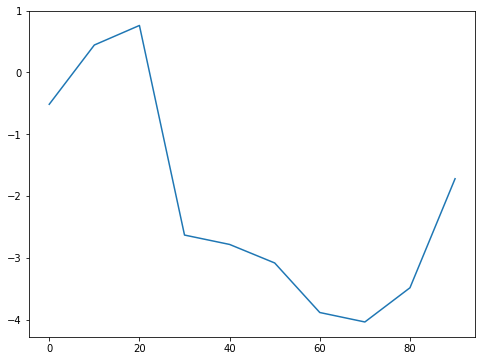

In [38]:
s = pd.Series(np.random.randn(10).cumsum(), index=np.arange(0, 100, 10))
s.plot()

该Series对象的索引会被传给matplotlib，并用以绘制X轴。可以通过use_index=False禁用该功能。X轴的刻度和界限可以通过xticks和xlim选项进行调节，Y轴就用yticks和ylim。plot参数的完整列表请参见表9-3。我只会讲解其中几个，剩下的就留给读者自己去研究了。
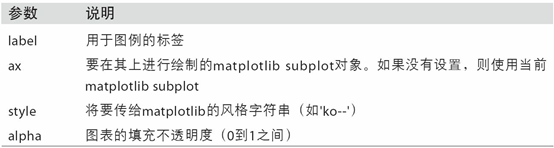

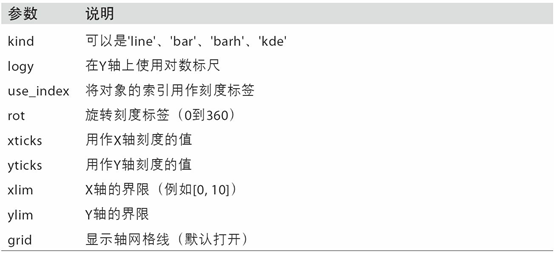
pandas的大部分绘图方法都有一个可选的ax参数，它可以是一个matplotlib的subplot对象。这使你能够在网格布局中更为灵活地处理subplot的位置。

DataFrame的plot方法会在一个subplot中为各列绘制一条线，并自动创建图例（如图9-14所示）：

<AxesSubplot:>

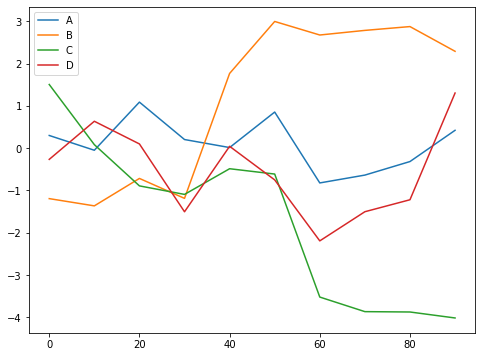

In [39]:
df = pd.DataFrame(np.random.randn(10, 4).cumsum(0),
                     columns=['A', 'B', 'C', 'D'],
                     index=np.arange(0, 100, 10))

df.plot()

plot属性包含一批不同绘图类型的方法。例如，df.plot()等价于df.plot.line()。后面会学习这些方法。

>笔记：plot的其他关键字参数会被传给相应的matplotlib绘图函数，所以要更深入地自定义图表，就必须学习更多有关matplotlib API的知识。

DataFrame还有一些用于对列进行灵活处理的选项，例如，是要将所有列都绘制到一个subplot中还是创建各自的subplot。详细信息请参见表9-4。
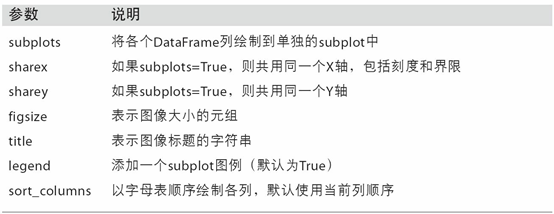

>注意： 有关时间序列的绘图，请见第11章。

<AxesSubplot:>

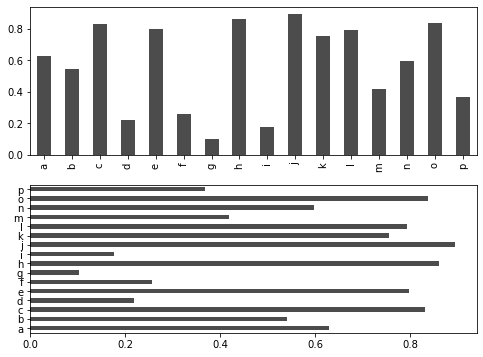

In [40]:
fig, axes = plt.subplots(2, 1)

data = pd.Series(np.random.rand(16), index=list('abcdefghijklmnop'))
data.plot.bar(ax=axes[0], color='k', alpha=0.7)
data.plot.barh(ax=axes[1], color='k', alpha=0.7)

color='k'和alpha=0.7设定了图形的颜色为黑色，并使用部分的填充透明度。对于DataFrame，柱状图会将每一行的值分为一组，并排显示，如图9-16所示：

In [41]:
df = pd.DataFrame(np.random.rand(6, 4),
                    index=['one', 'two', 'three', 'four', 'five', 'six'],
                     columns=pd.Index(['A', 'B', 'C', 'D'], name='Genus'))
df

Genus,A,B,C,D
one,0.969523,0.941447,0.854395,0.070148
two,0.394130,0.338944,0.809603,0.435350
three,0.491378,0.051768,0.822884,0.097724
four,0.406509,0.884567,0.574429,0.869957
five,0.131085,0.264113,0.200692,0.838610
six,0.661710,0.885301,0.258283,0.241631


<AxesSubplot:>

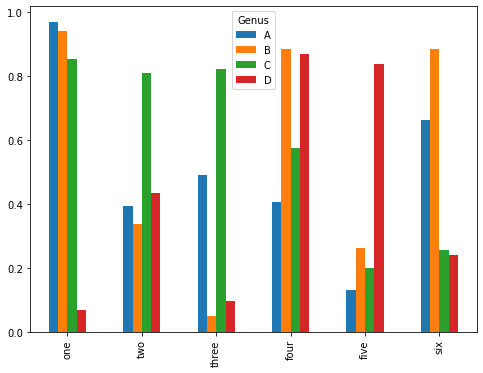

In [42]:
df.plot.bar()

注意，DataFrame各列的名称"Genus"被用作了图例的标题。

设置stacked=True即可为DataFrame生成堆积柱状图，这样每行的值就会被堆积在一起（如图9-17所示）：

<AxesSubplot:>

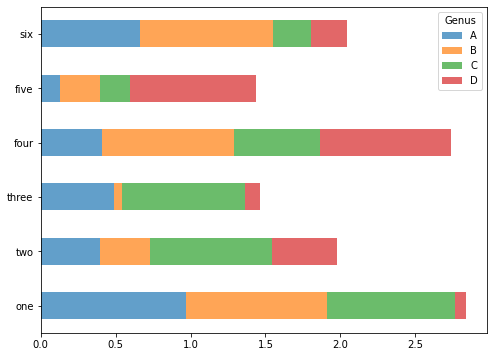

In [43]:
df.plot.barh(stacked=True, alpha=0.7)

再以本书前面用过的那个有关小费的数据集为例，假设我们想要做一张堆积柱状图以展示每天各种聚会规模的数据点的百分比。我用read_csv将数据加载进来，然后根据日期和聚会规模创建一张交叉表：

In [44]:
tips = pd.read_csv('examples/tips.csv')

party_counts = pd.crosstab(tips['day'], tips['size'])
party_counts

size,1,2,3,4,5,6
day,,,,,,
Fri,1,16,1,1,0,0
Sat,2,53,18,13,1,0
Sun,0,39,15,18,3,1
Thur,1,48,4,5,1,3


In [45]:
party_counts = party_counts.loc[:, 2:5]
party_counts

size,2,3,4,5
day,,,,
Fri,16,1,1,0
Sat,53,18,13,1
Sun,39,15,18,3
Thur,48,4,5,1


然后进行规格化，使得各行的和为1，并生成图表（如图9-18所示）：

In [46]:
# Normalize to sum to 1
party_pcts = party_counts.div(party_counts.sum(1), axis=0)
party_pcts

size,2,3,4,5
day,,,,
Fri,0.888889,0.055556,0.055556,0.000000
Sat,0.623529,0.211765,0.152941,0.011765
Sun,0.520000,0.200000,0.240000,0.040000
Thur,0.827586,0.068966,0.086207,0.017241


<AxesSubplot:xlabel='day'>

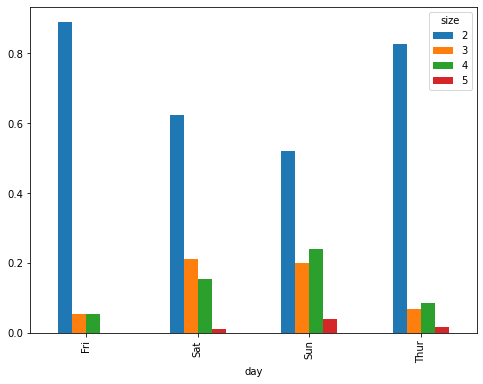

In [47]:
 party_pcts.plot.bar()

于是，通过该数据集就可以看出，聚会规模在周末会变大。

#### #对于在绘制一个图形之前，需要进行合计的数据，使用seaborn可以减少工作量。用seaborn来看每天的小费比例（图9-19是结果）：

In [48]:
import seaborn as sns
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])
tips.head()

,total_bill,tip,smoker,day,time,size,tip_pct
0,16.99,1.01,No,Sun,Dinner,2,0.063204
1,10.34,1.66,No,Sun,Dinner,3,0.191244
2,21.01,3.50,No,Sun,Dinner,3,0.199886
3,23.68,3.31,No,Sun,Dinner,2,0.162494
4,24.59,3.61,No,Sun,Dinner,4,0.172069


<AxesSubplot:xlabel='tip_pct', ylabel='day'>

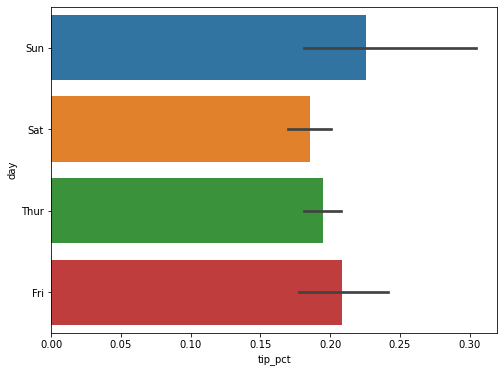

In [49]:
sns.barplot(x='tip_pct', y='day', data=tips, orient='h')

seaborn的绘制函数使用data参数，它可能是pandas的DataFrame。其它的参数是关于列的名字。因为一天的每个值有多次观察，柱状图的值是tip_pct的平均值。绘制在柱状图上的黑线代表95%置信区间（可以通过可选参数配置）。

seaborn.barplot有颜色选项，使我们能够通过一个额外的值设置（见图9-20）：

<AxesSubplot:xlabel='tip_pct', ylabel='day'>

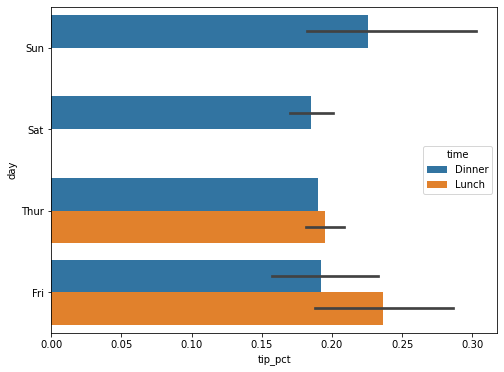

In [50]:
sns.barplot(x='tip_pct', y='day', hue='time', data=tips, orient='h')

注意，seaborn已经自动修改了图形的美观度：默认调色板，图形背景和网格线的颜色。你可以用seaborn.set在不同的图形外观之间切换：

#### #直方图和密度图
直方图（histogram）是一种可以对值频率进行离散化显示的柱状图。数据点被拆分到离散的、间隔均匀的面元中，绘制的是各面元中数据点的数量。再以前面那个小费数据为例，通过在Series使用plot.hist方法，我们可以生成一张“小费占消费总额百分比”的直方图（如图9-21所示）：

<AxesSubplot:ylabel='Frequency'>

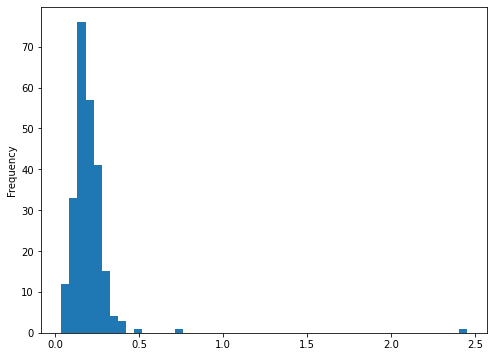

In [51]:
tips['tip_pct'].plot.hist(bins=50)

与此相关的一种图表类型是密度图，它是通过计算“可能会产生观测数据的连续概率分布的估计”而产生的。一般的过程是将该分布近似为一组核（即诸如正态分布之类的较为简单的分布）。因此，密度图也被称作KDE（Kernel Density Estimate，核密度估计）图。使用plot.kde和标准混合正态分布估计即可生成一张密度图（见图9-22）：

<AxesSubplot:ylabel='Density'>

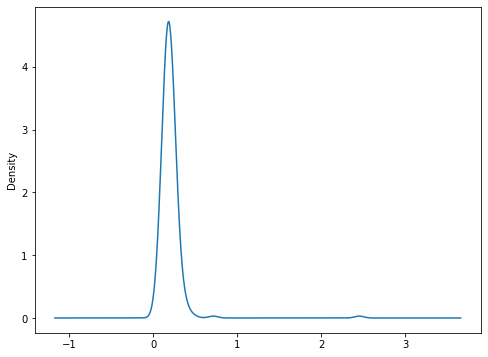

In [52]:
tips['tip_pct'].plot.density()

seaborn的distplot方法绘制直方图和密度图更加简单，还可以同时画出直方图和连续密度估计图。作为例子，考虑一个双峰分布，由两个不同的标准正态分布组成（见图9-23）：

<AxesSubplot:>

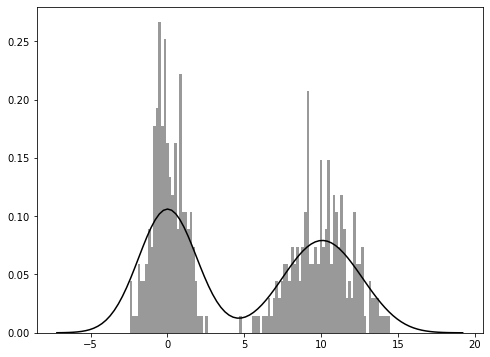

In [53]:
comp1 = np.random.normal(0, 1, size=200)
comp2 = np.random.normal(10, 2, size=200)
values = pd.Series(np.concatenate([comp1, comp2]))
sns.distplot(values, bins=100, color='k')

#### #散布图或点图
点图或散布图是观察两个一维数据序列之间的关系的有效手段。在下面这个例子中，我加载了来自statsmodels项目的macrodata数据集，选择了几个变量，然后计算对数差：

In [54]:
macro = pd.read_csv('examples/macrodata.csv')
data = macro[['cpi', 'm1', 'tbilrate', 'unemp']]
trans_data = np.log(data).diff().dropna()
trans_data[-5:]

,cpi,m1,tbilrate,unemp
198,-0.007904,0.045361,-0.396881,0.105361
199,-0.021979,0.066753,-2.277267,0.139762
200,0.002340,0.010286,0.606136,0.160343
201,0.008419,0.037461,-0.200671,0.127339
202,0.008894,0.012202,-0.405465,0.042560


然后可以使用seaborn的regplot方法，它可以做一个散布图，并加上一条线性回归的线（见图9-24）：

Text(0.5, 1.0, 'Changes in log m1 versus log unemp')

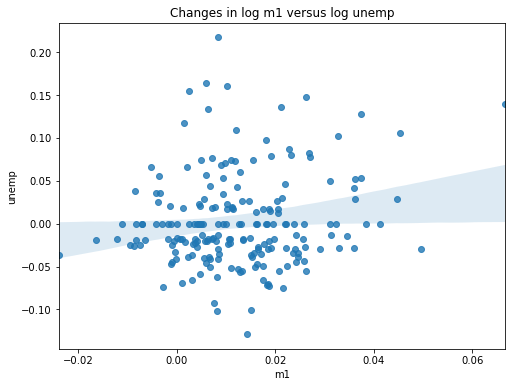

In [55]:
sns.regplot('m1', 'unemp', data=trans_data)
plt.title('Changes in log %s versus log %s' % ('m1', 'unemp'))

在探索式数据分析工作中，同时观察一组变量的散布图是很有意义的，这也被称为散布图矩阵（scatter plot matrix）。纯手工创建这样的图表很费工夫，所以seaborn提供了一个便捷的pairplot函数，它支持在对角线上放置每个变量的直方图或密度估计（见图9-25）：

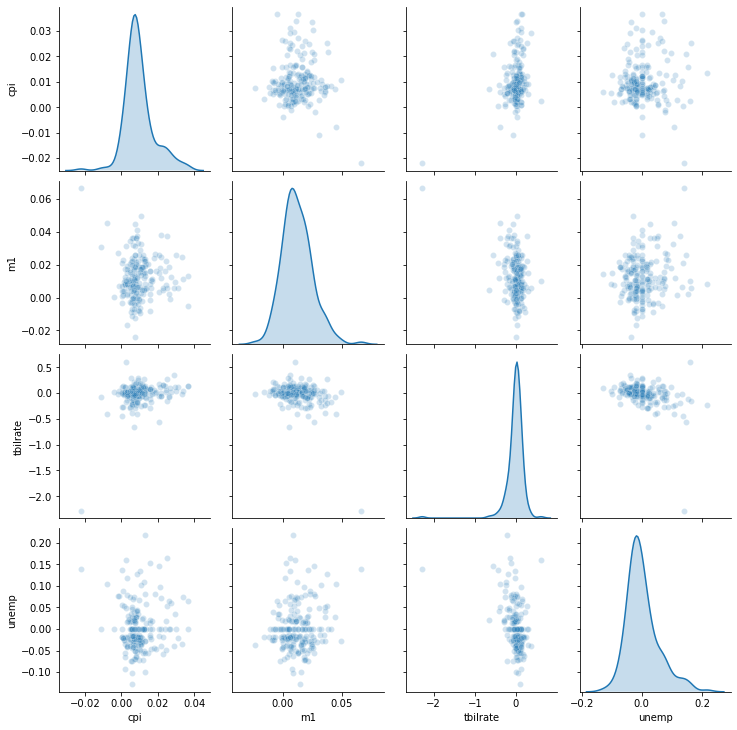

In [56]:
sns.pairplot(trans_data, diag_kind='kde', plot_kws={'alpha': 0.2})

你可能注意到了plot_kws参数。它可以让我们传递配置选项到非对角线元素上的图形使用。对于更详细的配置选项，可以查阅seaborn.pairplot文档字符串。


##分面网格（facet grid）和类型数据
要是数据集有额外的分组维度呢？有多个分类变量的数据可视化的一种方法是使用小面网格。seaborn有一个有用的内置函数factorplot，可以简化制作多种分面图（见图9-26）：

C:\Users\mok9697m\anaconda3\envs\tf37\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


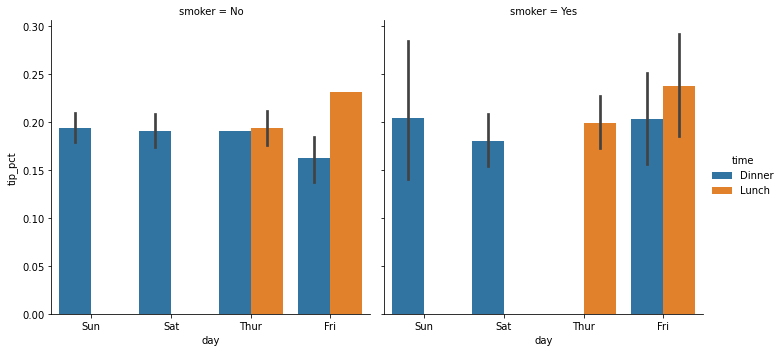

In [57]:
sns.factorplot(x='day', y='tip_pct', hue='time', col='smoker',
                 kind='bar', data=tips[tips.tip_pct < 1])

除了在分面中用不同的颜色按时间分组，我们还可以通过给每个时间值添加一行来扩展分面网格：

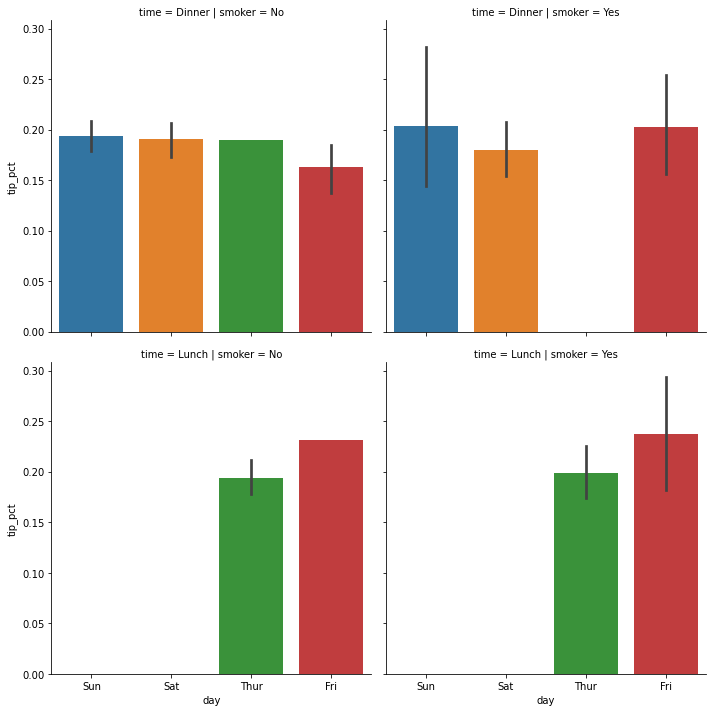

In [58]:
sns.factorplot(x='day', y='tip_pct', row='time',
                   col='smoker',
                   kind='bar', data=tips[tips.tip_pct < 1])

factorplot支持其它的绘图类型，你可能会用到。例如，盒图（它可以显示中位数，四分位数，和异常值）就是一个有用的可视化类型（见图9-28）：

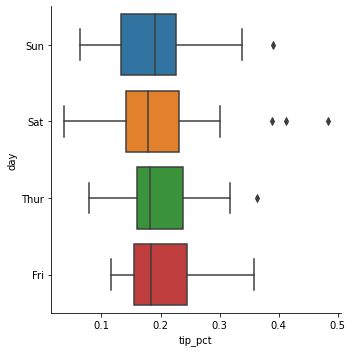

In [59]:
sns.factorplot(x='tip_pct', y='day', kind='box',
                  data=tips[tips.tip_pct < 0.5])

### 10.1 GroupBy机制
Hadley Wickham（许多热门R语言包的作者）创造了一个用于表示分组运算的术语"split-apply-combine"（拆分－应用－合并）。第一个阶段，pandas对象（无论是Series、DataFrame还是其他的）中的数据会根据你所提供的一个或多个键被拆分（split）为多组。拆分操作是在对象的特定轴上执行的。例如，DataFrame可以在其行（axis=0）或列（axis=1）上进行分组。然后，将一个函数应用（apply）到各个分组并产生一个新值。最后，所有这些函数的执行结果会被合并（combine）到最终的结果对象中。结果对象的形式一般取决于数据上所执行的操作。图10-1大致说明了一个简单的分组聚合过程。
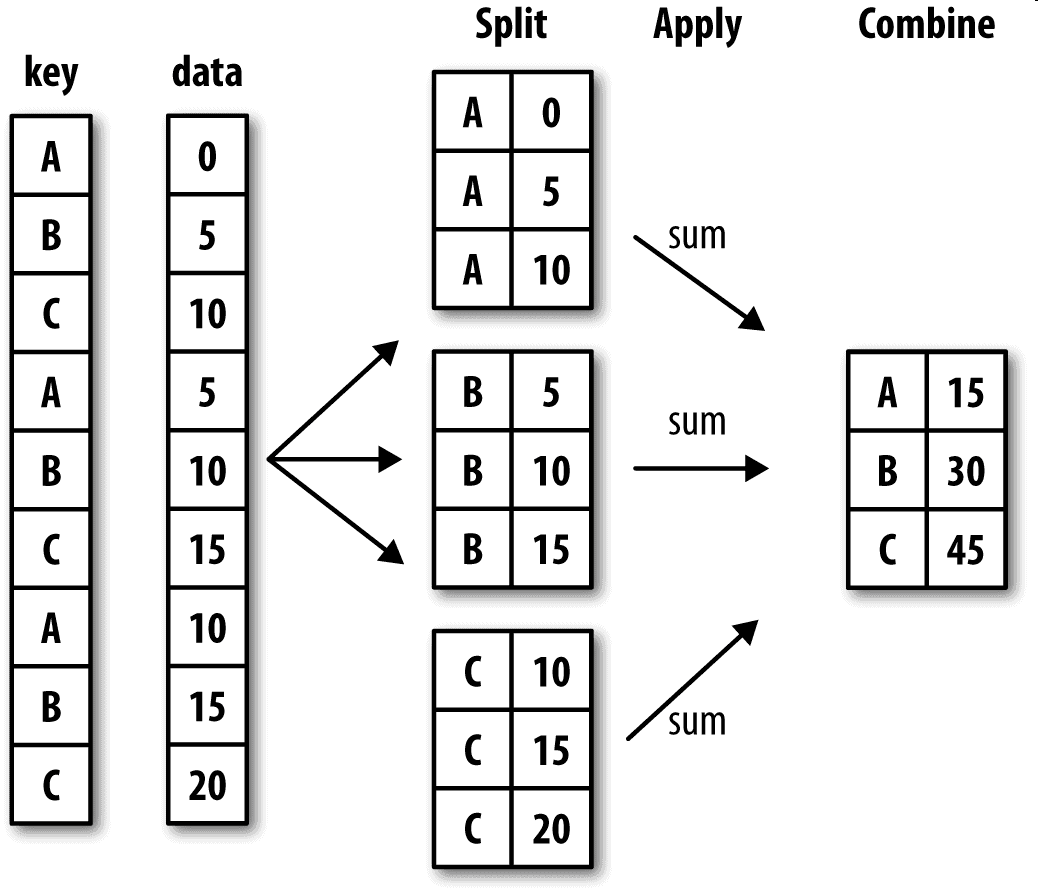
分组键可以有多种形式，且类型不必相同：

- 列表或数组，其长度与待分组的轴一样。
- 表示DataFrame某个列名的值。
- 字典或Series，给出待分组轴上的值与分组名之间的对应关系。
- 函数，用于处理轴索引或索引中的各个标签。

注意，后三种都只是快捷方式而已，其最终目的仍然是产生一组用于拆分对象的值。如果觉得这些东西看起来很抽象，不用担心，我将在本章中给出大量有关于此的示例。首先来看看下面这个非常简单的表格型数据集（以DataFrame的形式）：

In [60]:
df = pd.DataFrame({'key1' : ['a', 'a', 'b', 'b', 'a'],
                       'key2' : ['one', 'two', 'one', 'two', 'one'],
                       'data1' : np.random.randn(5),
                      'data2' : np.random.randn(5)})
df

,key1,key2,data1,data2
0,a,one,-0.818127,0.131305
1,a,two,-0.987856,1.468059
2,b,one,-0.931016,0.464044
3,b,two,-0.510289,-0.557968
4,a,one,0.466513,-0.185774


假设你想要按key1进行分组，并计算data1列的平均值。实现该功能的方式有很多，而我们这里要用的是：访问data1，并根据key1调用groupby：

In [61]:
grouped = df['data1'].groupby(df['key1'])
grouped

变量grouped是一个GroupBy对象。它实际上还没有进行任何计算，只是含有一些有关分组键df['key1']的中间数据而已。换句话说，该对象已经有了接下来对各分组执行运算所需的一切信息。例如，我们可以调用GroupBy的mean方法来计算分组平均值：

In [62]:
 grouped.mean()

key1
a   -0.446490
b   -0.720652
Name: data1, dtype: float64

In [63]:
grouped.count()

key1
a    3
b    2
Name: data1, dtype: int64

稍后我将详细讲解.mean()的调用过程。这里最重要的是，数据（Series）根据分组键进行了聚合，产生了一个新的Series，其索引为key1列中的唯一值。之所以结果中索引的名称为key1，是因为原始DataFrame的列df['key1']就叫这个名字。

如果我们一次传入多个数组的列表，就会得到不同的结果：

In [64]:
means = df['data1'].groupby([df['key1'], df['key2']]).mean()

In [65]:
means

key1  key2
a     one    -0.175807
      two    -0.987856
b     one    -0.931016
      two    -0.510289
Name: data1, dtype: float64

这里，我通过两个键对数据进行了分组，得到的Series具有一个层次化索引（由唯一的键对组成）：

In [66]:
means.unstack()

key2,one,two
key1,,
a,-0.175807,-0.987856
b,-0.931016,-0.510289


在这个例子中，分组键均为Series。

通常，分组信息就位于相同的要处理DataFrame中。这里，你还可以将列名（可以是字符串、数字或其他Python对象）用作分组键：

In [68]:
df.groupby('key1').mean()

,data1,data2
key1,,
a,-0.446490,0.471197
b,-0.720652,-0.046962


In [69]:
df.groupby(['key1', 'key2']).mean()

data1     data2
key1 key2                    
a    one  -0.175807 -0.027234
     two  -0.987856  1.468059
b    one  -0.931016  0.464044
     two  -0.510289 -0.557968

你可能已经注意到了，第一个例子在执行df.groupby('key1').mean()时，结果中没有key2列。这是因为df['key2']不是数值数据（俗称“麻烦列”），所以被从结果中排除了。默认情况下，所有数值列都会被聚合，虽然有时可能会被过滤为一个子集，稍后就会碰到。

无论你准备拿groupby做什么，都有可能会用到GroupBy的size方法，它可以返回一个含有分组大小的Series：

In [70]:
df.groupby(['key1', 'key2']).size()

key1  key2
a     one     2
      two     1
b     one     1
      two     1
dtype: int64

注意，任何分组关键词中的缺失值，都会被从结果中除去。

#### #对分组进行迭代

GroupBy对象支持迭代，可以产生一组二元元组（由分组名和数据块组成）。看下面的例子：

In [71]:
for name, group in df.groupby('key1'):
    print(name)
    print(group)

a
  key1 key2     data1     data2
0    a  one -0.818127  0.131305
1    a  two -0.987856  1.468059
4    a  one  0.466513 -0.185774
b
  key1 key2     data1     data2
2    b  one -0.931016  0.464044
3    b  two -0.510289 -0.557968


对于多重键的情况，元组的第一个元素将会是由键值组成的元组：

In [72]:
for (k1, k2), group in df.groupby(['key1', 'key2']):
    print((k1, k2))
    print(group)

('a', 'one')
  key1 key2     data1     data2
0    a  one -0.818127  0.131305
4    a  one  0.466513 -0.185774
('a', 'two')
  key1 key2     data1     data2
1    a  two -0.987856  1.468059
('b', 'one')
  key1 key2     data1     data2
2    b  one -0.931016  0.464044
('b', 'two')
  key1 key2     data1     data2
3    b  two -0.510289 -0.557968


当然，你可以对这些数据片段做任何操作。有一个你可能会觉得有用的运算：将这些数据片段做成一个字典：

In [73]:
pieces = dict(list(df.groupby('key1')))
pieces

{'a':   key1 key2     data1     data2
 0    a  one -0.818127  0.131305
 1    a  two -0.987856  1.468059
 4    a  one  0.466513 -0.185774,
 'b':   key1 key2     data1     data2
 2    b  one -0.931016  0.464044
 3    b  two -0.510289 -0.557968}

In [74]:
pieces['b']

,key1,key2,data1,data2
2,b,one,-0.931016,0.464044
3,b,two,-0.510289,-0.557968


#### #选取一列或列的子集
对于由DataFrame产生的GroupBy对象，如果用一个（单个字符串）或一组（字符串数组）列名对其进行索引，就能实现选取部分列进行聚合的目的。也就是说：

尤其对于大数据集，很可能只需要对部分列进行聚合。例如，在前面那个数据集中，如果只需计算data2列的平均值并以DataFrame形式得到结果，可以这样写：

In [82]:
df['data2'].groupby([df['key1'], df['key2']]).mean()#老方法

key1  key2
a     one    -0.027234
      two     1.468059
b     one     0.464044
      two    -0.557968
Name: data2, dtype: float64

In [83]:
df.groupby(['key1', 'key2'])[['data2']].mean()

data2
key1 key2          
a    one  -0.027234
     two   1.468059
b    one   0.464044
     two  -0.557968

这种索引操作所返回的对象是一个已分组的DataFrame（如果传入的是列表或数组）或已分组的Series（如果传入的是标量形式的单个列名）

In [84]:
s_grouped = df.groupby(['key1', 'key2'])['data2']
s_grouped

In [85]:
s_grouped.mean()

key1  key2
a     one    -0.027234
      two     1.468059
b     one     0.464044
      two    -0.557968
Name: data2, dtype: float64

#### #通过字典或Series进行分组
除数组以外，分组信息还可以其他形式存在。来看另一个示例DataFrame：

In [86]:
people = pd.DataFrame(np.random.randn(5, 5),
                          columns=['a', 'b', 'c', 'd', 'e'],
                          index=['Joe', 'Steve', 'Wes', 'Jim', 'Travis'])

people.iloc[2:3, [1, 2]] = np.nan # Add a few NA values

people

,a,b,c,d,e
Joe,-0.962088,-0.420139,0.189035,0.458812,0.506295
Steve,0.570698,-0.638752,2.334093,-0.727480,0.314113
Wes,-1.114637,NaN,NaN,-0.375603,-0.011761
Jim,-1.494377,-1.146841,-0.454205,-0.715699,-0.489240
Travis,0.541406,0.306253,0.558158,0.491072,1.070515


现在，假设已知列的分组关系，并希望根据分组计算列的和：

In [87]:
mapping = {'a': 'red', 'b': 'red', 'c': 'blue',
              'd': 'blue', 'e': 'red', 'f' : 'orange'}

现在，你可以将这个字典传给groupby，来构造数组，但我们可以直接传递字典（我包含了键“f”来强调，存在未使用的分组键是可以的）：
>groupby默认是在axis=0上进行分组的，通过设置也可以在其他任何轴上进行分组。

In [88]:
by_column = people.groupby(mapping, axis=1)#groupby默认是在axis=0上进行分组的，通过设置也可以在其他任何轴上进行分组。
by_column.sum()

,blue,red
Joe,0.647847,-0.875931
Steve,1.606613,0.246059
Wes,-0.375603,-1.126398
Jim,-1.169904,-3.130458
Travis,1.049230,1.918175


In [93]:
people.groupby(mapping, axis=1).count()#

,blue,red
Joe,2,3
Steve,2,3
Wes,1,2
Jim,2,3
Travis,2,3


Series也有同样的功能，它可以被看做一个固定大小的映射：

In [94]:
map_series = pd.Series(mapping)
map_series

a       red
b       red
c      blue
d      blue
e       red
f    orange
dtype: object

In [95]:
people.groupby(map_series, axis=1).count()

,blue,red
Joe,2,3
Steve,2,3
Wes,1,2
Jim,2,3
Travis,2,3


#### #通过函数进行分组
比起使用字典或Series，使用Python函数是一种更原生的方法定义分组映射。任何被当做分组键的函数都会在各个索引值上被调用一次，其返回值就会被用作分组名称。具体点说，以上一小节的示例DataFrame为例，其索引值为人的名字。你可以计算一个字符串长度的数组，更简单的方法是传入len函数：

In [96]:
 people.groupby(len).sum()

,a,b,c,d,e
3,-3.571102,-1.566979,-0.265169,-0.632490,0.005294
5,0.570698,-0.638752,2.334093,-0.727480,0.314113
6,0.541406,0.306253,0.558158,0.491072,1.070515


#### #根据索引级别分组
层次化索引数据集最方便的地方就在于它能够根据轴索引的一个级别进行聚合：

In [98]:
columns = pd.MultiIndex.from_arrays([['US', 'US', 'US', 'JP', 'JP'],
                                       [1, 3, 5, 1, 3]],
                                        names=['cty', 'tenor'])
columns

MultiIndex([('US', 1),
            ('US', 3),
            ('US', 5),
            ('JP', 1),
            ('JP', 3)],
           names=['cty', 'tenor'])

In [99]:
hier_df = pd.DataFrame(np.random.randn(4, 5), columns=columns)
hier_df

cty          US                            JP          
tenor         1         3         5         1         3
0      0.499150 -0.088386  1.046382  0.270550 -1.641626
1      0.984387 -1.545602 -0.169742 -2.362339  1.612758
2     -0.003803 -1.326228 -1.506712 -0.680487  0.162407
3      0.308965  0.942358 -0.528079 -0.481175 -0.286047

要根据级别分组，使用level关键字传递级别序号或名字：

In [100]:
hier_df.groupby(level='cty', axis=1).count()

cty,JP,US
0,2,3
1,2,3
2,2,3
3,2,3


#### #10.2 数据聚合
聚合指的是任何能够从数组产生标量值的数据转换过程。之前的例子已经用过一些，比如mean、count、min以及sum等。你可能想知道在GroupBy对象上调用mean()时究竟发生了什么。许多常见的聚合运算（如表10-1所示）都有进行优化。然而，除了这些方法，你还可以使用其它的。
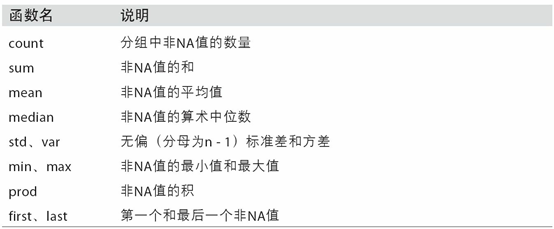
你可以使用自己发明的聚合运算，还可以调用分组对象上已经定义好的任何方法。例如，quantile可以计算Series或DataFrame列的样本分位数。

虽然quantile并没有明确地实现于GroupBy，但它是一个Series方法，所以这里是能用的。实际上，GroupBy会高效地对Series进行切片，然后对各片调用piece.quantile(0.9)，最后将这些结果组装成最终结果：

In [102]:
df

,key1,key2,data1,data2
0,a,one,-0.818127,0.131305
1,a,two,-0.987856,1.468059
2,b,one,-0.931016,0.464044
3,b,two,-0.510289,-0.557968
4,a,one,0.466513,-0.185774


In [103]:
grouped = df.groupby('key1')
grouped['data1'].quantile(0.9)

key1
a    0.209585
b   -0.552361
Name: data1, dtype: float64

如果要使用你自己的聚合函数，只需将其传入aggregate或agg方法即可：

In [104]:
def peak_to_peak(arr):
       return arr.max() - arr.min()
grouped.agg(peak_to_peak)

,data1,data2
key1,,
a,1.454369,1.653833
b,0.420727,1.022012


你可能注意到注意，有些方法（如describe）也是可以用在这里的，即使严格来讲，它们并非聚合运算：

In [105]:
grouped.describe()

data1                                                              \
     count      mean       std       min       25%       50%       75%   
key1                                                                     
a      3.0 -0.446490  0.795225 -0.987856 -0.902991 -0.818127 -0.175807   
b      2.0 -0.720652  0.297499 -0.931016 -0.825834 -0.720652 -0.615471   

               data2                                                    \
           max count      mean       std       min       25%       50%   
key1                                                                     
a     0.466513   3.0  0.471197  0.877744 -0.185774 -0.027234  0.131305   
b    -0.510289   2.0 -0.046962  0.722672 -0.557968 -0.302465 -0.046962   

                          
           75%       max  
key1                      
a     0.799682  1.468059  
b     0.208541  0.464044

#### #面向列的多函数应用
回到前面小费的例子。使用read_csv导入数据之后，我们添加了一个小费百分比的列tip_pct：

In [106]:
tips = pd.read_csv('examples/tips.csv')

# Add tip percentage of total bill
tips['tip_pct'] = tips['tip'] / tips['total_bill']
tips[:6]

,total_bill,tip,smoker,day,time,size,tip_pct
0,16.99,1.01,No,Sun,Dinner,2,0.059447
1,10.34,1.66,No,Sun,Dinner,3,0.160542
2,21.01,3.50,No,Sun,Dinner,3,0.166587
3,23.68,3.31,No,Sun,Dinner,2,0.139780
4,24.59,3.61,No,Sun,Dinner,4,0.146808
5,25.29,4.71,No,Sun,Dinner,4,0.186240


你已经看到，对Series或DataFrame列的聚合运算其实就是使用aggregate（使用自定义函数）或调用诸如mean、std之类的方法。然而，你可能希望对不同的列使用不同的聚合函数，或一次应用多个函数。其实这也好办，我将通过一些示例来进行讲解。首先，我根据天和smoker对tips进行分组：

In [107]:
grouped = tips.groupby(['day', 'smoker'])

>注意，对于表10-1中的那些描述统计，可以将函数名以字符串的形式传入：

In [109]:
grouped_pct = grouped['tip_pct']
grouped_pct.agg('mean')

day   smoker
Fri   No        0.151650
      Yes       0.174783
Sat   No        0.158048
      Yes       0.147906
Sun   No        0.160113
      Yes       0.187250
Thur  No        0.160298
      Yes       0.163863
Name: tip_pct, dtype: float64

In [110]:
grouped_pct.agg('sum')

day   smoker
Fri   No        0.606602
      Yes       2.621746
Sat   No        7.112145
      Yes       6.212055
Sun   No        9.126438
      Yes       3.557756
Thur  No        7.213414
      Yes       2.785676
Name: tip_pct, dtype: float64

如果传入一组函数或函数名，得到的DataFrame的列就会以相应的函数命名：

In [111]:
grouped_pct.agg(['mean', 'std', peak_to_peak])

mean       std  peak_to_peak
day  smoker                                  
Fri  No      0.151650  0.028123      0.067349
     Yes     0.174783  0.051293      0.159925
Sat  No      0.158048  0.039767      0.235193
     Yes     0.147906  0.061375      0.290095
Sun  No      0.160113  0.042347      0.193226
     Yes     0.187250  0.154134      0.644685
Thur No      0.160298  0.038774      0.193350
     Yes     0.163863  0.039389      0.151240

这里，我们传递了一组聚合函数进行聚合，独立对数据分组进行评估。

你并非一定要接受GroupBy自动给出的那些列名，特别是lambda函数，它们的名称是'<lambda>'，这样的辨识度就很低了（通过函数的__name__属性看看就知道了）。因此，如果传入的是一个由(name,function)元组组成的列表，则各元组的第一个元素就会被用作DataFrame的列名（可以将这种二元元组列表看做一个有序映射）：

In [112]:
grouped_pct.agg([('foo', 'mean'), ('bar', np.std)])

foo       bar
day  smoker                    
Fri  No      0.151650  0.028123
     Yes     0.174783  0.051293
Sat  No      0.158048  0.039767
     Yes     0.147906  0.061375
Sun  No      0.160113  0.042347
     Yes     0.187250  0.154134
Thur No      0.160298  0.038774
     Yes     0.163863  0.039389

对于DataFrame，你还有更多选择，你可以定义一组应用于全部列的一组函数，或不同的列应用不同的函数。假设我们想要对tip_pct和total_bill列计算三个统计信息：

In [113]:
functions = ['count', 'mean', 'max']
result = grouped['tip_pct', 'total_bill'].agg(functions)
result

C:\Users\mok9697m\anaconda3\envs\tf37\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


tip_pct                     total_bill                  
              count      mean       max      count       mean    max
day  smoker                                                         
Fri  No           4  0.151650  0.187735          4  18.420000  22.75
     Yes         15  0.174783  0.263480         15  16.813333  40.17
Sat  No          45  0.158048  0.291990         45  19.661778  48.33
     Yes         42  0.147906  0.325733         42  21.276667  50.81
Sun  No          57  0.160113  0.252672         57  20.506667  48.17
     Yes         19  0.187250  0.710345         19  24.120000  45.35
Thur No          45  0.160298  0.266312         45  17.113111  41.19
     Yes         17  0.163863  0.241255         17  19.190588  43.11

如你所见，结果DataFrame拥有层次化的列，这相当于分别对各列进行聚合，然后用concat将结果组装到一起，使用列名用作keys参数：

In [115]:
result['tip_pct']

count      mean       max
day  smoker                           
Fri  No          4  0.151650  0.187735
     Yes        15  0.174783  0.263480
Sat  No         45  0.158048  0.291990
     Yes        42  0.147906  0.325733
Sun  No         57  0.160113  0.252672
     Yes        19  0.187250  0.710345
Thur No         45  0.160298  0.266312
     Yes        17  0.163863  0.241255

跟前面一样，这里也可以传入带有自定义名称的一组元组：

In [116]:
ftuples = [('Durchschnitt', 'mean'),('Abweichung', np.var)]
grouped['tip_pct', 'total_bill'].agg(ftuples)

C:\Users\mok9697m\anaconda3\envs\tf37\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


tip_pct              total_bill            
            Durchschnitt Abweichung Durchschnitt  Abweichung
day  smoker                                                 
Fri  No         0.151650   0.000791    18.420000   25.596333
     Yes        0.174783   0.002631    16.813333   82.562438
Sat  No         0.158048   0.001581    19.661778   79.908965
     Yes        0.147906   0.003767    21.276667  101.387535
Sun  No         0.160113   0.001793    20.506667   66.099980
     Yes        0.187250   0.023757    24.120000  109.046044
Thur No         0.160298   0.001503    17.113111   59.625081
     Yes        0.163863   0.001551    19.190588   69.808518

现在，假设你想要对一个列或不同的列应用不同的函数。具体的办法是向agg传入一个从列名映射到函数的字典：

In [117]:
grouped.agg({'tip' : np.max, 'size' : 'sum'})

tip  size
day  smoker             
Fri  No       3.50     9
     Yes      4.73    31
Sat  No       9.00   115
     Yes     10.00   104
Sun  No       6.00   167
     Yes      6.50    49
Thur No       6.70   112
     Yes      5.00    40

In [118]:
grouped.agg({'tip_pct' : ['min', 'max', 'mean', 'std'],
                'size' : 'sum'})

tip_pct                               size
                  min       max      mean       std  sum
day  smoker                                             
Fri  No      0.120385  0.187735  0.151650  0.028123    9
     Yes     0.103555  0.263480  0.174783  0.051293   31
Sat  No      0.056797  0.291990  0.158048  0.039767  115
     Yes     0.035638  0.325733  0.147906  0.061375  104
Sun  No      0.059447  0.252672  0.160113  0.042347  167
     Yes     0.065660  0.710345  0.187250  0.154134   49
Thur No      0.072961  0.266312  0.160298  0.038774  112
     Yes     0.090014  0.241255  0.163863  0.039389   40

只有将多个函数应用到至少一列时，DataFrame才会拥有层次化的列。
#### #以“没有行索引”的形式返回聚合数据
到目前为止，所有示例中的聚合数据都有由唯一的分组键组成的索引（可能还是层次化的）。由于并不总是需要如此，所以你可以向groupby传入as_index=False以禁用该功能：

In [119]:
tips.groupby(['day', 'smoker'], as_index=False).mean()

,day,smoker,total_bill,tip,size,tip_pct
0,Fri,No,18.420000,2.812500,2.250000,0.151650
1,Fri,Yes,16.813333,2.714000,2.066667,0.174783
2,Sat,No,19.661778,3.102889,2.555556,0.158048
3,Sat,Yes,21.276667,2.875476,2.476190,0.147906
4,Sun,No,20.506667,3.167895,2.929825,0.160113
5,Sun,Yes,24.120000,3.516842,2.578947,0.187250
6,Thur,No,17.113111,2.673778,2.488889,0.160298
7,Thur,Yes,19.190588,3.030000,2.352941,0.163863


### 10.3 apply：一般性的“拆分－应用－合并”
最通用的GroupBy方法是apply，本节剩余部分将重点讲解它。如图10-2所示，apply会将待处理的对象拆分成多个片段，然后对各片段调用传入的函数，最后尝试将各片段组合到一起。
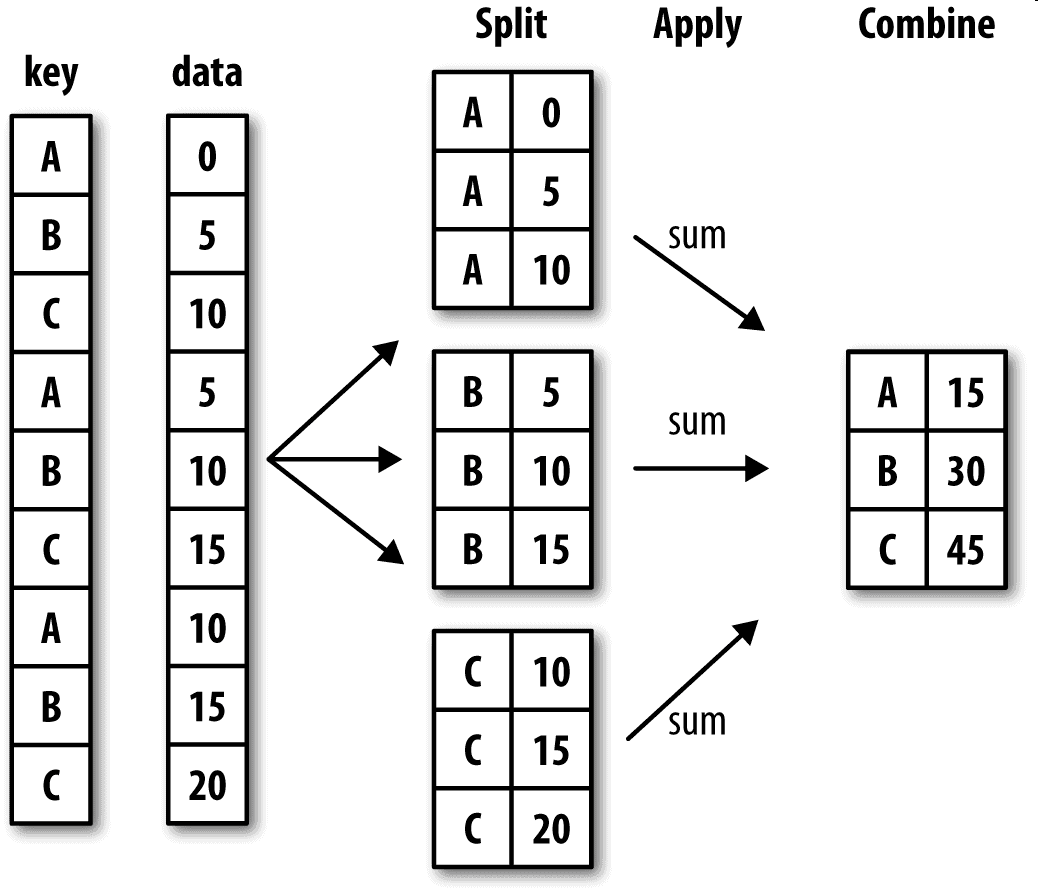

回到之前那个小费数据集，假设你想要根据分组选出最高的5个tip_pct值。首先，编写一个选取指定列具有最大值的行的函数：

In [120]:
def top(df, n=5, column='tip_pct'):
        return df.sort_values(by=column)[-n:]

top(tips, n=6)

,total_bill,tip,smoker,day,time,size,tip_pct
109,14.31,4.00,Yes,Sat,Dinner,2,0.279525
183,23.17,6.50,Yes,Sun,Dinner,4,0.280535
232,11.61,3.39,No,Sat,Dinner,2,0.291990
67,3.07,1.00,Yes,Sat,Dinner,1,0.325733
178,9.60,4.00,Yes,Sun,Dinner,2,0.416667
172,7.25,5.15,Yes,Sun,Dinner,2,0.710345


现在，如果对smoker分组并用该函数调用apply，就会得到：

In [122]:
tips.groupby('smoker').apply(top)

total_bill   tip smoker   day    time  size   tip_pct
smoker                                                           
No     88        24.71  5.85     No  Thur   Lunch     2  0.236746
       185       20.69  5.00     No   Sun  Dinner     5  0.241663
       51        10.29  2.60     No   Sun  Dinner     2  0.252672
       149        7.51  2.00     No  Thur   Lunch     2  0.266312
       232       11.61  3.39     No   Sat  Dinner     2  0.291990
Yes    109       14.31  4.00    Yes   Sat  Dinner     2  0.279525
       183       23.17  6.50    Yes   Sun  Dinner     4  0.280535
       67         3.07  1.00    Yes   Sat  Dinner     1  0.325733
       178        9.60  4.00    Yes   Sun  Dinner     2  0.416667
       172        7.25  5.15    Yes   Sun  Dinner     2  0.710345

这里发生了什么？top函数在DataFrame的各个片段上调用，然后结果由pandas.concat组装到一起，并以分组名称进行了标记。于是，最终结果就有了一个层次化索引，其内层索引值来自原DataFrame。

如果传给apply的函数能够接受其他参数或关键字，则可以将这些内容放在函数名后面一并传入：

In [123]:
tips.groupby(['smoker', 'day']).apply(top, n=1, column='total_bill')

total_bill    tip smoker   day    time  size   tip_pct
smoker day                                                             
No     Fri  94        22.75   3.25     No   Fri  Dinner     2  0.142857
       Sat  212       48.33   9.00     No   Sat  Dinner     4  0.186220
       Sun  156       48.17   5.00     No   Sun  Dinner     6  0.103799
       Thur 142       41.19   5.00     No  Thur   Lunch     5  0.121389
Yes    Fri  95        40.17   4.73    Yes   Fri  Dinner     4  0.117750
       Sat  170       50.81  10.00    Yes   Sat  Dinner     3  0.196812
       Sun  182       45.35   3.50    Yes   Sun  Dinner     3  0.077178
       Thur 197       43.11   5.00    Yes  Thur   Lunch     4  0.115982

In [124]:
tips.groupby(['smoker', 'day']).apply(top, n=2, column='total_bill')#

total_bill    tip smoker   day    time  size   tip_pct
smoker day                                                             
No     Fri  91        22.49   3.50     No   Fri  Dinner     2  0.155625
            94        22.75   3.25     No   Fri  Dinner     2  0.142857
       Sat  59        48.27   6.73     No   Sat  Dinner     4  0.139424
            212       48.33   9.00     No   Sat  Dinner     4  0.186220
       Sun  112       38.07   4.00     No   Sun  Dinner     3  0.105070
            156       48.17   5.00     No   Sun  Dinner     6  0.103799
       Thur 85        34.83   5.17     No  Thur   Lunch     4  0.148435
            142       41.19   5.00     No  Thur   Lunch     5  0.121389
Yes    Fri  90        28.97   3.00    Yes   Fri  Dinner     2  0.103555
            95        40.17   4.73    Yes   Fri  Dinner     4  0.117750
       Sat  102       44.30   2.50    Yes   Sat  Dinner     3  0.056433
            170       50.81  10.00    Yes   Sat  Dinner     3  0.196812
       Sun  184       40.55   3.00    Yes   Sun  Dinner     2  0.073983
            182       45.35   3.50    Yes   Sun  Dinner     3  0.077178
       Thur 83        32.68   5.00    Yes  Thur   Lunch     2  0.152999
            197       43.11   5.00    Yes  Thur   Lunch     4  0.115982

>笔记：除这些基本用法之外，能否充分发挥apply的威力很大程度上取决于你的创造力。传入的那个函数能做什么全由你说了算，它只需返回一个pandas对象或标量值即可。本章后续部分的示例主要用于讲解如何利用groupby解决各种各样的问题。

可能你已经想起来了，之前我在GroupBy对象上调用过describe：

In [125]:
result = tips.groupby('smoker')['tip_pct'].describe()
result

,count,mean,std,min,25%,50%,75%,max
smoker,,,,,,,,
No,151.0,0.159328,0.039910,0.056797,0.136906,0.155625,0.185014,0.291990
Yes,93.0,0.163196,0.085119,0.035638,0.106771,0.153846,0.195059,0.710345


In [126]:
result.unstack('smoker')

       smoker
count  No        151.000000
       Yes        93.000000
mean   No          0.159328
       Yes         0.163196
std    No          0.039910
       Yes         0.085119
min    No          0.056797
       Yes         0.035638
25%    No          0.136906
       Yes         0.106771
50%    No          0.155625
       Yes         0.153846
75%    No          0.185014
       Yes         0.195059
max    No          0.291990
       Yes         0.710345
dtype: float64

在GroupBy中，当你调用诸如describe之类的方法时，实际上只是应用了下面两条代码的快捷方式而已：

#### #禁止分组键
从上面的例子中可以看出，分组键会跟原始对象的索引共同构成结果对象中的层次化索引。将group_keys=False传入groupby即可禁止该效果：

In [127]:
tips.groupby('smoker', group_keys=False).apply(top)

,total_bill,tip,smoker,day,time,size,tip_pct
88,24.71,5.85,No,Thur,Lunch,2,0.236746
185,20.69,5.00,No,Sun,Dinner,5,0.241663
51,10.29,2.60,No,Sun,Dinner,2,0.252672
149,7.51,2.00,No,Thur,Lunch,2,0.266312
232,11.61,3.39,No,Sat,Dinner,2,0.291990
109,14.31,4.00,Yes,Sat,Dinner,2,0.279525
183,23.17,6.50,Yes,Sun,Dinner,4,0.280535
67,3.07,1.00,Yes,Sat,Dinner,1,0.325733
178,9.60,4.00,Yes,Sun,Dinner,2,0.416667
172,7.25,5.15,Yes,Sun,Dinner,2,0.710345


#### #分位数和桶分析
我曾在第8章中讲过，pandas有一些能根据指定面元或样本分位数将数据拆分成多块的工具（比如cut和qcut）。将这些函数跟groupby结合起来，就能非常轻松地实现对数据集的桶（bucket）或分位数（quantile）分析了。以下面这个简单的随机数据集为例，我们利用cut将其装入长度相等的桶中：

In [128]:
frame = pd.DataFrame({'data1': np.random.randn(1000),
                       'data2': np.random.randn(1000)})

quartiles = pd.cut(frame.data1, 4)
quartiles[:10]

0       (1.431, 2.946]
1    (-1.597, -0.0827]
2    (-1.597, -0.0827]
3       (1.431, 2.946]
4     (-0.0827, 1.431]
5     (-0.0827, 1.431]
6     (-0.0827, 1.431]
7     (-3.117, -1.597]
8     (-0.0827, 1.431]
9    (-1.597, -0.0827]
Name: data1, dtype: category
Categories (4, interval[float64]): [(-3.117, -1.597] < (-1.597, -0.0827] < (-0.0827, 1.431] < (1.431, 2.946]]

由cut返回的Categorical对象可直接传递到groupby。因此，我们可以像下面这样对data2列做一些统计计算：

In [131]:
def get_stats(group):
        return {'min': group.min(), 'max': group.max(),
                'count': group.count(), 'mean': group.mean()}

grouped = frame.data2.groupby(quartiles)

In [132]:
grouped.apply(get_stats).unstack()

,min,max,count,mean
data1,,,,
"(-3.117, -1.597]",-1.814094,3.373871,59.0,-0.110086
"(-1.597, -0.0827]",-2.915745,2.577857,404.0,-0.051835
"(-0.0827, 1.431]",-3.365062,3.713174,444.0,-0.037432
"(1.431, 2.946]",-2.669320,2.827087,93.0,-0.001072


这些都是长度相等的桶。要根据样本分位数得到大小相等的桶，使用qcut即可。传入labels=False即可只获取分位数的编号：

In [134]:
# Return quantile numbers
grouping = pd.qcut(frame.data1, 10, labels=False)
grouped = frame.data2.groupby(grouping)
grouped.apply(get_stats).unstack()

,min,max,count,mean
data1,,,,
0,-2.164939,3.373871,100.0,-0.057859
1,-2.578881,1.914534,100.0,-0.064543
2,-2.915745,2.440291,100.0,-0.012452
3,-1.916895,2.577857,100.0,-0.252011
4,-3.157149,2.173247,100.0,0.023463
5,-2.616172,2.318630,100.0,-0.050628
6,-2.059815,3.713174,100.0,0.106522
7,-2.401223,3.233534,100.0,0.029272
8,-3.365062,2.052807,100.0,-0.132332


In [135]:
grouping[:10]

0    9
1    1
2    1
3    9
4    4
5    5
6    7
7    0
8    5
9    3
Name: data1, dtype: int64

#### #示例：用特定于分组的值填充缺失值
对于缺失数据的清理工作，有时你会用dropna将其替换掉，而有时则可能会希望用一个固定值或由数据集本身所衍生出来的值去填充NA值。这时就得使用fillna这个工具了。在下面这个例子中，我用平均值去填充NA值：

In [136]:
s = pd.Series(np.random.randn(6))
s[::2] = np.nan
s

0         NaN
1    0.852509
2         NaN
3   -1.913309
4         NaN
5   -0.873817
dtype: float64

In [137]:
s.fillna(s.mean())

0   -0.644872
1    0.852509
2   -0.644872
3   -1.913309
4   -0.644872
5   -0.873817
dtype: float64

假设你需要对不同的分组填充不同的值。一种方法是将数据分组，并使用apply和一个能够对各数据块调用fillna的函数即可。下面是一些有关美国几个州的示例数据，这些州又被分为东部和西部：

In [140]:
states = ['Ohio', 'New York', 'Vermont', 'Florida',
             'Oregon', 'Nevada', 'California', 'Idaho']

group_key = ['East'] * 4 + ['West'] * 4

data = pd.Series(np.random.randn(8), index=states)
data

Ohio          0.125854
New York      0.408097
Vermont       0.516085
Florida       1.044636
Oregon       -0.083162
Nevada       -0.627765
California   -0.876407
Idaho         1.785165
dtype: float64

['East'] * 4产生了一个列表，包括了['East']中元素的四个拷贝。将这些列表串联起来。

将一些值设为缺失：

In [143]:
group_key

['East', 'East', 'East', 'East', 'West', 'West', 'West', 'West']

In [141]:
data[['Vermont', 'Nevada', 'Idaho']] = np.nan
data

Ohio          0.125854
New York      0.408097
Vermont            NaN
Florida       1.044636
Oregon       -0.083162
Nevada             NaN
California   -0.876407
Idaho              NaN
dtype: float64

In [142]:
data.groupby(group_key).mean()

East    0.526196
West   -0.479785
dtype: float64

我们可以用分组平均值去填充NA值:

In [144]:
fill_mean = lambda g: g.fillna(g.mean())
data.groupby(group_key).apply(fill_mean)

Ohio          0.125854
New York      0.408097
Vermont       0.526196
Florida       1.044636
Oregon       -0.083162
Nevada       -0.479785
California   -0.876407
Idaho        -0.479785
dtype: float64

另外，也可以在代码中预定义各组的填充值。由于分组具有一个name属性，所以我们可以拿来用一下：

In [145]:
 fill_values = {'East': 0.5, 'West': -1}

fill_func = lambda g: g.fillna(fill_values[g.name])
data.groupby(group_key).apply(fill_func)

Ohio          0.125854
New York      0.408097
Vermont       0.500000
Florida       1.044636
Oregon       -0.083162
Nevada       -1.000000
California   -0.876407
Idaho        -1.000000
dtype: float64

#### #示例：分组加权平均数和相关系数
根据groupby的“拆分－应用－合并”范式，可以进行DataFrame的列与列之间或两个Series之间的运算（比如分组加权平均）。以下面这个数据集为例，它含有分组键、值以及一些权重值：

In [146]:
df = pd.DataFrame({'category': ['a', 'a', 'a', 'a',
                                    'b', 'b', 'b', 'b'],
                      'data': np.random.randn(8),
                      'weights': np.random.rand(8)})
df

,category,data,weights
0,a,-0.070186,0.574743
1,a,0.859793,0.067909
2,a,-2.624386,0.596558
3,a,0.895189,0.663044
4,b,0.166937,0.578829
5,b,1.217863,0.556674
6,b,-1.211500,0.065319
7,b,0.575383,0.751788


然后可以利用category计算分组加权平均数：

In [147]:
grouped = df.groupby('category')

In [148]:
grouped.count()

,data,weights
category,,
a,4,4
b,4,4


In [149]:
get_wavg = lambda g: np.average(g['data'], weights=g['weights'])
grouped.apply(get_wavg)

category
a   -0.501510
b    0.577695
dtype: float64

### 10.4 透视表和交叉表

透视表（pivot table）是各种电子表格程序和其他数据分析软件中一种常见的数据汇总工具。它根据一个或多个键对数据进行聚合，并根据行和列上的分组键将数据分配到各个矩形区域中。在Python和pandas中，可以通过本章所介绍的groupby功能以及（能够利用层次化索引的）重塑运算制作透视表。DataFrame有一个pivot_table方法，此外还有一个顶级的pandas.pivot_table函数。除能为groupby提供便利之外，pivot_table还可以添加分项小计，也叫做margins。

回到小费数据集，假设我想要根据day和smoker计算分组平均数（pivot_table的默认聚合类型），并将day和smoker放到行上：

In [150]:
tips.pivot_table(index=['day', 'smoker'])

size       tip   tip_pct  total_bill
day  smoker                                          
Fri  No      2.250000  2.812500  0.151650   18.420000
     Yes     2.066667  2.714000  0.174783   16.813333
Sat  No      2.555556  3.102889  0.158048   19.661778
     Yes     2.476190  2.875476  0.147906   21.276667
Sun  No      2.929825  3.167895  0.160113   20.506667
     Yes     2.578947  3.516842  0.187250   24.120000
Thur No      2.488889  2.673778  0.160298   17.113111
     Yes     2.352941  3.030000  0.163863   19.190588

可以用groupby直接来做。现在，假设我们只想聚合tip_pct和size，而且想根据time进行分组。我将smoker放到列上，把day放到行上：

In [151]:
tips.pivot_table(['tip_pct', 'size'], index=['time', 'day'],
                  columns='smoker')

size             tip_pct          
smoker             No       Yes        No       Yes
time   day                                         
Dinner Fri   2.000000  2.222222  0.139622  0.165347
       Sat   2.555556  2.476190  0.158048  0.147906
       Sun   2.929825  2.578947  0.160113  0.187250
       Thur  2.000000       NaN  0.159744       NaN
Lunch  Fri   3.000000  1.833333  0.187735  0.188937
       Thur  2.500000  2.352941  0.160311  0.163863

还可以对这个表作进一步的处理，传入margins=True添加分项小计。这将会添加标签为All的行和列，其值对应于单个等级中所有数据的分组统计：

In [152]:
tips.pivot_table(['tip_pct', 'size'], index=['time', 'day'],
                     columns='smoker', margins=True)

size                       tip_pct                    
smoker             No       Yes       All        No       Yes       All
time   day                                                             
Dinner Fri   2.000000  2.222222  2.166667  0.139622  0.165347  0.158916
       Sat   2.555556  2.476190  2.517241  0.158048  0.147906  0.153152
       Sun   2.929825  2.578947  2.842105  0.160113  0.187250  0.166897
       Thur  2.000000       NaN  2.000000  0.159744       NaN  0.159744
Lunch  Fri   3.000000  1.833333  2.000000  0.187735  0.188937  0.188765
       Thur  2.500000  2.352941  2.459016  0.160311  0.163863  0.161301
All          2.668874  2.408602  2.569672  0.159328  0.163196  0.160803

这里，All值为平均数：不单独考虑烟民与非烟民（All列），不单独考虑行分组两个级别中的任何单项（All行）。

要使用其他的聚合函数，将其传给aggfunc即可。例如，使用count或len可以得到有关分组大小的交叉表（计数或频率）：

In [153]:
tips.pivot_table('tip_pct', index=['time', 'smoker'], columns='day',
                     aggfunc=len, margins=True)

day             Fri   Sat   Sun  Thur    All
time   smoker                               
Dinner No       3.0  45.0  57.0   1.0  106.0
       Yes      9.0  42.0  19.0   NaN   70.0
Lunch  No       1.0   NaN   NaN  44.0   45.0
       Yes      6.0   NaN   NaN  17.0   23.0
All            19.0  87.0  76.0  62.0  244.0

In [155]:
tips.pivot_table('tip_pct', index=['time', 'smoker'], columns='day',
                     aggfunc= 'count', margins=True)

day             Fri   Sat   Sun  Thur  All
time   smoker                             
Dinner No       3.0  45.0  57.0   1.0  106
       Yes      9.0  42.0  19.0   NaN   70
Lunch  No       1.0   NaN   NaN  44.0   45
       Yes      6.0   NaN   NaN  17.0   23
All            19.0  87.0  76.0  62.0  244

In [156]:
tips.pivot_table('tip_pct', index=['time', 'smoker'], columns='day',
                     aggfunc= 'max', margins=True)

day                 Fri       Sat       Sun      Thur       All
time   smoker                                                  
Dinner No      0.155625  0.291990  0.252672  0.159744  0.291990
       Yes     0.263480  0.325733  0.710345       NaN  0.710345
Lunch  No      0.187735       NaN       NaN  0.266312  0.266312
       Yes     0.259314       NaN       NaN  0.241255  0.259314
All            0.263480  0.325733  0.710345  0.266312  0.710345

如果存在空的组合（也就是NA），你可能会希望设置一个fill_value：

In [157]:
tips.pivot_table('tip_pct', index=['time', 'size', 'smoker'],
                     columns='day', aggfunc='mean', fill_value=0)

day                      Fri       Sat       Sun      Thur
time   size smoker                                        
Dinner 1    No      0.000000  0.137931  0.000000  0.000000
            Yes     0.000000  0.325733  0.000000  0.000000
       2    No      0.139622  0.162705  0.168859  0.159744
            Yes     0.171297  0.148668  0.207893  0.000000
       3    No      0.000000  0.154661  0.152663  0.000000
            Yes     0.000000  0.144995  0.152660  0.000000
       4    No      0.000000  0.150096  0.148143  0.000000
            Yes     0.117750  0.124515  0.193370  0.000000
       5    No      0.000000  0.000000  0.206928  0.000000
            Yes     0.000000  0.106572  0.065660  0.000000
       6    No      0.000000  0.000000  0.103799  0.000000
Lunch  1    No      0.000000  0.000000  0.000000  0.181728
            Yes     0.223776  0.000000  0.000000  0.000000
       2    No      0.000000  0.000000  0.000000  0.166005
            Yes     0.181969  0.000000  0.000000  0.158843
       3    No      0.187735  0.000000  0.000000  0.084246
            Yes     0.000000  0.000000  0.000000  0.204952
       4    No      0.000000  0.000000  0.000000  0.138919
            Yes     0.000000  0.000000  0.000000  0.155410
       5    No      0.000000  0.000000  0.000000  0.121389
       6    No      0.000000  0.000000  0.000000  0.173706

pivot_table的参数说明请参见表10-2。
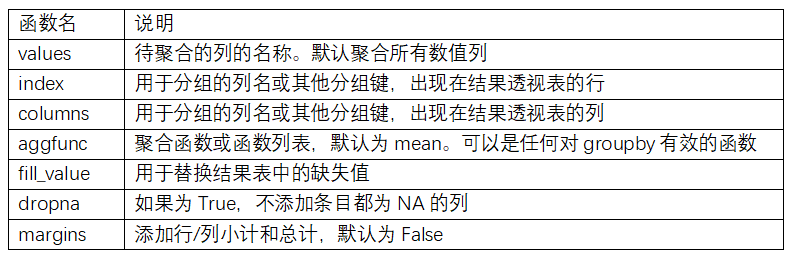

#### #交叉表：crosstab
交叉表（cross-tabulation，简称crosstab）是一种用于计算分组频率的特殊透视表。看下面的例子：

In [159]:
from io import StringIO
data = """\
Sample  Nationality  Handedness
1   USA  Right-handed
2   Japan    Left-handed
3   USA  Right-handed
4   Japan    Right-handed
5   Japan    Left-handed
6   Japan    Right-handed
7   USA  Right-handed
8   USA  Left-handed
9   Japan    Right-handed
10  USA  Right-handed"""
data = pd.read_table(StringIO(data), sep='\s+')
data

,Sample,Nationality,Handedness
0,1,USA,Right-handed
1,2,Japan,Left-handed
2,3,USA,Right-handed
3,4,Japan,Right-handed
4,5,Japan,Left-handed
5,6,Japan,Right-handed
6,7,USA,Right-handed
7,8,USA,Left-handed
8,9,Japan,Right-handed
9,10,USA,Right-handed


作为调查分析的一部分，我们可能想要根据国籍和用手习惯对这段数据进行统计汇总。虽然可以用pivot_table实现该功能，但是pandas.crosstab函数会更方便：

In [160]:
pd.crosstab(data.Nationality, data.Handedness, margins=True)

Handedness,Left-handed,Right-handed,All
Nationality,,,
Japan,2,3,5
USA,1,4,5
All,3,7,10


crosstab的前两个参数可以是数组或Series，或是数组列表。就像小费数据：

In [161]:
 pd.crosstab([tips.time, tips.day], tips.smoker, margins=True)

smoker        No  Yes  All
time   day                
Dinner Fri     3    9   12
       Sat    45   42   87
       Sun    57   19   76
       Thur    1    0    1
Lunch  Fri     1    6    7
       Thur   44   17   61
All          151   93  244

## 时间序列
时间序列（time series）数据是一种重要的结构化数据形式，应用于多个领域，包括金融学、经济学、生态学、神经科学、物理学等。在多个时间点观察或测量到的任何事物都可以形成一段时间序列。很多时间序列是固定频率的，也就是说，数据点是根据某种规律定期出现的（比如每15秒、每5分钟、每月出现一次）。时间序列也可以是不定期的，没有固定的时间单位或单位之间的偏移量。时间序列数据的意义取决于具体的应用场景，主要有以下几种：

- 时间戳（timestamp），特定的时刻。
- 固定时期（period），如2007年1月或2010年全年。
- 时间间隔（interval），由起始和结束时间戳表示。时期（period）可以被看做间隔（interval）的特例。
- 实验或过程时间，每个时间点都是相对于特定起始时间的一个度量。例如，从放入烤箱时起，每秒钟饼干的直径。

本章主要讲解前3种时间序列。许多技术都可用于处理实验型时间序列，其索引可能是一个整数或浮点数（表示从实验开始算起已经过去的时间）。最简单也最常见的时间序列都是用时间戳进行索引的。

>提示：pandas也支持基于timedeltas的指数，它可以有效代表实验或经过的时间。这本书不涉及timedelta指数，但你可以学习pandas的文档（http://pandas.pydata.org/）。

pandas提供了许多内置的时间序列处理工具和数据算法。因此，你可以高效处理非常大的时间序列，轻松地进行切片/切块、聚合、对定期/不定期的时间序列进行重采样等。有些工具特别适合金融和经济应用，你当然也可以用它们来分析服务器日志数据。



### 11.1 日期和时间数据类型及工具
Python标准库包含用于日期（date）和时间（time）数据的数据类型，而且还有日历方面的功能。我们主要会用到datetime、time以及calendar模块。datetime.datetime（也可以简写为datetime）是用得最多的数据类型：

In [2]:
from datetime import datetime
now = datetime.now()
now

datetime.datetime(2021, 1, 25, 15, 3, 34, 128524)

In [3]:
now.year, now.month, now.day

(2021, 1, 25)

datetime以毫秒形式存储日期和时间。timedelta表示两个datetime对象之间的时间差：

In [4]:
delta = datetime(2011, 1, 7) - datetime(2008, 6, 24, 8, 15)
delta

datetime.timedelta(days=926, seconds=56700)

In [5]:
 delta.days

926

In [6]:
delta.seconds

56700

可以给datetime对象加上（或减去）一个或多个timedelta，这样会产生一个新对象：

In [7]:
from datetime import timedelta
start = datetime(2011, 1, 7)
start + timedelta(12)

datetime.datetime(2011, 1, 19, 0, 0)

In [8]:
start - 2 * timedelta(12)

datetime.datetime(2010, 12, 14, 0, 0)

datetime模块中的数据类型参见表10-1。虽然本章主要讲的是pandas数据类型和高级时间序列处理，但你肯定会在Python的其他地方遇到有关datetime的数据类型。

表11-1 datetime模块中的数据类型
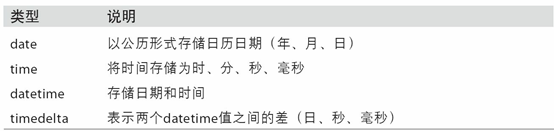

#### #字符串和datetime的相互转换
利用str或strftime方法（传入一个格式化字符串），datetime对象和pandas的Timestamp对象（稍后就会介绍）可以被格式化为字符串：

In [9]:
stamp = datetime(2021, 1, 3)
stamp

datetime.datetime(2021, 1, 3, 0, 0)

In [10]:
str(stamp)

'2021-01-03 00:00:00'

In [11]:
stamp.strftime('%Y-%m-%d')

'2021-01-03'

表11-2列出了全部的格式化编码。
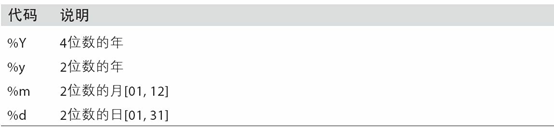


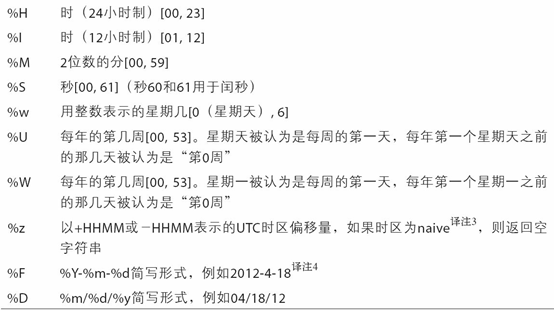

In [12]:
stamp.strftime('%D')

'01/03/21'

datetime.strptime可以用这些格式化编码将字符串转换为日期：

In [13]:
value = '2011-01-03'
datetime.strptime(value, '%Y-%m-%d')

datetime.datetime(2011, 1, 3, 0, 0)

datetime.strptime是通过已知格式进行日期解析的最佳方式。但是每次都要编写格式定义是很麻烦的事情，尤其是对于一些常见的日期格式。这种情况下，你可以用dateutil这个第三方包中的parser.parse方法（pandas中已经自动安装好了）：

In [14]:
from dateutil.parser import parse
parse('2011-01-03')

datetime.datetime(2011, 1, 3, 0, 0)

dateutil可以解析几乎所有人类能够理解的日期表示形式：

In [15]:
parse('Jan 31, 1997 10:45 PM')

datetime.datetime(1997, 1, 31, 22, 45)

在国际通用的格式中，日出现在月的前面很普遍，传入dayfirst=True即可解决这个问题：

In [16]:
parse('6/12/2011', dayfirst=True)

datetime.datetime(2011, 12, 6, 0, 0)

pandas通常是用于处理成组日期的，不管这些日期是DataFrame的轴索引还是列。to_datetime方法可以解析多种不同的日期表示形式。对标准日期格式（如ISO8601）的解析非常快：

In [17]:
datestrs = ['2011-07-06 12:00:00', '2011-08-06 00:00:00']
pd.to_datetime(datestrs)

DatetimeIndex(['2011-07-06 12:00:00', '2011-08-06 00:00:00'], dtype='datetime64[ns]', freq=None)

In [18]:
 idx = pd.to_datetime(datestrs + [None])
idx

DatetimeIndex(['2011-07-06 12:00:00', '2011-08-06 00:00:00', 'NaT'], dtype='datetime64[ns]', freq=None)

In [19]:
idx[2]

NaT

In [20]:
pd.isnull(idx)

array([False, False,  True])

NaT（Not a Time）是pandas中时间戳数据的null值。

### 11.2 时间序列基础
pandas最基本的时间序列类型就是以时间戳（通常以Python字符串或datatime对象表示）为索引的Series：

In [2]:
from datetime import datetime

dates = [datetime(2011, 1, 2), datetime(2011, 1, 5),
           datetime(2011, 1, 7), datetime(2011, 1, 8),
           datetime(2011, 1, 10), datetime(2011, 1, 12)]

ts = pd.Series(np.random.randn(6), index=dates)
ts

2011-01-02    0.981749
2011-01-05    1.435170
2011-01-07   -0.284176
2011-01-08   -0.993897
2011-01-10    0.211639
2011-01-12   -0.189997
dtype: float64

这些datetime对象实际上是被放在一个DatetimeIndex中的：

In [3]:
ts.index

DatetimeIndex(['2011-01-02', '2011-01-05', '2011-01-07', '2011-01-08',
               '2011-01-10', '2011-01-12'],
              dtype='datetime64[ns]', freq=None)

跟其他Series一样，不同索引的时间序列之间的算术运算会自动按日期对齐：

In [4]:
ts[::2]

2011-01-02    0.981749
2011-01-07   -0.284176
2011-01-10    0.211639
dtype: float64

In [5]:
ts + ts[::2]

2011-01-02    1.963499
2011-01-05         NaN
2011-01-07   -0.568353
2011-01-08         NaN
2011-01-10    0.423278
2011-01-12         NaN
dtype: float64

ts[::2] 是每隔两个取一个。

pandas用NumPy的datetime64数据类型以纳秒形式存储时间戳：

In [6]:
ts.index.dtype

dtype('<M8[ns]')

DatetimeIndex中的各个标量值是pandas的Timestamp对象：

In [7]:
stamp = ts.index[0]
stamp

Timestamp('2011-01-02 00:00:00')

只要有需要，TimeStamp可以随时自动转换为datetime对象。此外，它还可以存储频率信息（如果有的话），且知道如何执行时区转换以及其他操作。稍后将对此进行详细讲解。

#### #索引、选取、子集构造
当你根据标签索引选取数据时，时间序列和其它的pandas.Series很像：

In [11]:
ts

2011-01-02    0.981749
2011-01-05    1.435170
2011-01-07   -0.284176
2011-01-08   -0.993897
2011-01-10    0.211639
2011-01-12   -0.189997
dtype: float64

In [9]:
stamp = ts.index[2]
stamp

Timestamp('2011-01-07 00:00:00')

In [10]:
ts[stamp]

-0.2841763682443197

还有一种更为方便的用法：传入一个可以被解释为日期的字符串：

In [12]:
 ts['1/10/2011']

0.21163906289977144

In [13]:
ts['20110110']

0.21163906289977144

对于较长的时间序列，只需传入“年”或“年月”即可轻松选取数据的切片：

In [14]:
longer_ts = pd.Series(np.random.randn(1000),
                      index=pd.date_range('1/1/2000', periods=1000))
longer_ts

2000-01-01    0.909093
2000-01-02   -1.934030
2000-01-03    0.118070
2000-01-04    0.555606
2000-01-05   -0.695409
                ...   
2002-09-22    0.432422
2002-09-23    1.016390
2002-09-24   -0.381832
2002-09-25   -1.490817
2002-09-26    0.155968
Freq: D, Length: 1000, dtype: float64

In [15]:
 longer_ts['2001']

2001-01-01    0.915129
2001-01-02    2.067895
2001-01-03   -0.034704
2001-01-04   -1.065302
2001-01-05    1.121960
                ...   
2001-12-27    2.083872
2001-12-28   -1.608107
2001-12-29   -0.655053
2001-12-30   -0.733341
2001-12-31   -1.017209
Freq: D, Length: 365, dtype: float64

这里，字符串“2001”被解释成年，并根据它选取时间区间。指定月也同样奏效：

In [16]:
longer_ts['2001-05']

2001-05-01    0.115156
2001-05-02   -0.469135
2001-05-03    1.265380
2001-05-04   -1.173697
2001-05-05    0.063465
2001-05-06   -0.968612
2001-05-07    1.372225
2001-05-08   -0.038475
2001-05-09    1.662233
2001-05-10    0.830437
2001-05-11    0.156375
2001-05-12    0.306752
2001-05-13   -0.322018
2001-05-14   -1.165142
2001-05-15   -1.306460
2001-05-16   -2.127518
2001-05-17    1.224043
2001-05-18   -0.886191
2001-05-19   -0.266982
2001-05-20    1.101243
2001-05-21   -0.595435
2001-05-22   -0.299880
2001-05-23   -0.400201
2001-05-24    0.880002
2001-05-25   -0.715393
2001-05-26    0.524753
2001-05-27    1.252106
2001-05-28    0.895671
2001-05-29   -1.291822
2001-05-30   -1.302310
2001-05-31    0.226724
Freq: D, dtype: float64

datetime对象也可以进行切片：

In [17]:
ts[datetime(2011, 1, 7):]

2011-01-07   -0.284176
2011-01-08   -0.993897
2011-01-10    0.211639
2011-01-12   -0.189997
dtype: float64

由于大部分时间序列数据都是按照时间先后排序的，因此你也可以用不存在于该时间序列中的时间戳对其进行切片（即范围查询）：

In [18]:
ts

2011-01-02    0.981749
2011-01-05    1.435170
2011-01-07   -0.284176
2011-01-08   -0.993897
2011-01-10    0.211639
2011-01-12   -0.189997
dtype: float64

In [19]:
ts['1/6/2011':'1/11/2011']

2011-01-07   -0.284176
2011-01-08   -0.993897
2011-01-10    0.211639
dtype: float64

跟之前一样，你可以传入字符串日期、datetime或Timestamp。注意，这样切片所产生的是原时间序列的视图，跟NumPy数组的切片运算是一样的。

这意味着，没有数据被复制，对切片进行修改会反映到原始数据上。

此外，还有一个等价的实例方法也可以截取两个日期之间TimeSeries：

In [20]:
ts.truncate(after='1/9/2011')

2011-01-02    0.981749
2011-01-05    1.435170
2011-01-07   -0.284176
2011-01-08   -0.993897
dtype: float64

面这些操作对DataFrame也有效。例如，对DataFrame的行进行索引：

In [22]:
dates = pd.date_range('1/1/2000', periods=100, freq='W-WED')

long_df = pd.DataFrame(np.random.randn(100, 4),
                           index=dates,
                           columns=['Colorado', 'Texas',
                                    'New York', 'Ohio'])
long_df

,Colorado,Texas,New York,Ohio
2000-01-05,1.098101,-0.776782,0.386758,0.038757
2000-01-12,-1.676883,0.012178,-0.725681,0.550668
2000-01-19,-0.274578,0.643887,-0.013242,-0.387430
2000-01-26,-0.237130,2.121699,-1.975062,-0.098328
2000-02-02,0.424180,-0.412642,-1.039395,-0.871270
...,...,...,...,...
2001-10-31,-0.541292,-0.150815,0.268493,1.000172
2001-11-07,-0.592305,0.030442,1.363804,0.170788
2001-11-14,0.044858,-0.337534,-0.032085,-0.347853
2001-11-21,-0.620604,0.854896,-1.142281,0.978597


In [23]:
long_df.loc['5-2001']

,Colorado,Texas,New York,Ohio
2001-05-02,-1.087339,0.869918,0.902841,0.088030
2001-05-09,0.446874,1.974566,0.784660,0.544519
2001-05-16,-0.584883,0.095679,1.832470,0.159535
2001-05-23,-1.352384,-0.517703,1.039337,-0.617144
2001-05-30,-0.444944,-0.401228,-0.718509,-0.469266


In [36]:
long_df.loc['2001-5-16']

Colorado   -0.584883
Texas       0.095679
New York    1.832470
Ohio        0.159535
Name: 2001-05-16 00:00:00, dtype: float64

In [39]:
long_df.loc['2001-5-9':'2001-5-16']

,Colorado,Texas,New York,Ohio
2001-05-09,0.446874,1.974566,0.78466,0.544519
2001-05-16,-0.584883,0.095679,1.83247,0.159535


#### #带有重复索引的时间序列
在某些应用场景中，可能会存在多个观测数据落在同一个时间点上的情况。下面就是一个例子：

In [40]:
dates = pd.DatetimeIndex(['1/1/2000', '1/2/2000', '1/2/2000',
                           '1/2/2000', '1/3/2000'])
dup_ts = pd.Series(np.arange(5), index=dates)
dup_ts

2000-01-01    0
2000-01-02    1
2000-01-02    2
2000-01-02    3
2000-01-03    4
dtype: int32

通过检查索引的is_unique属性，我们就可以知道它是不是唯一的：

In [41]:
dup_ts.index.is_unique

False

对这个时间序列进行索引，要么产生标量值，要么产生切片，具体要看所选的时间点是否重复：

In [42]:
dup_ts['1/3/2000']  # not duplicated

4

In [43]:
dup_ts['1/2/2000']  # duplicated

2000-01-02    1
2000-01-02    2
2000-01-02    3
dtype: int32

假设你想要对具有非唯一时间戳的数据进行聚合。一个办法是使用groupby，并传入level=0：

In [44]:
grouped = dup_ts.groupby(level=0)
grouped.mean()

2000-01-01    0
2000-01-02    2
2000-01-03    4
dtype: int32

In [45]:
grouped.count()

2000-01-01    1
2000-01-02    3
2000-01-03    1
dtype: int64

### 11.3 日期的范围、频率以及移动
pandas中的原生时间序列一般被认为是不规则的，也就是说，它们没有固定的频率。对于大部分应用程序而言，这是无所谓的。但是，它常常需要以某种相对固定的频率进行分析，比如每日、每月、每15分钟等（这样自然会在时间序列中引入缺失值）。幸运的是，pandas有一整套标准时间序列频率以及用于重采样、频率推断、生成固定频率日期范围的工具。

#### #生成日期范围
虽然我之前用的时候没有明说，但你可能已经猜到pandas.date_range可用于根据指定的频率生成指定长度的DatetimeIndex：

In [48]:
index = pd.date_range('2012-04-01', '2012-06-01')
index

DatetimeIndex(['2012-04-01', '2012-04-02', '2012-04-03', '2012-04-04',
               '2012-04-05', '2012-04-06', '2012-04-07', '2012-04-08',
               '2012-04-09', '2012-04-10', '2012-04-11', '2012-04-12',
               '2012-04-13', '2012-04-14', '2012-04-15', '2012-04-16',
               '2012-04-17', '2012-04-18', '2012-04-19', '2012-04-20',
               '2012-04-21', '2012-04-22', '2012-04-23', '2012-04-24',
               '2012-04-25', '2012-04-26', '2012-04-27', '2012-04-28',
               '2012-04-29', '2012-04-30', '2012-05-01', '2012-05-02',
               '2012-05-03', '2012-05-04', '2012-05-05', '2012-05-06',
               '2012-05-07', '2012-05-08', '2012-05-09', '2012-05-10',
               '2012-05-11', '2012-05-12', '2012-05-13', '2012-05-14',
               '2012-05-15', '2012-05-16', '2012-05-17', '2012-05-18',
               '2012-05-19', '2012-05-20', '2012-05-21', '2012-05-22',
               '2012-05-23', '2012-05-24', '2012-05-25', '2012-05-26',
      

默认情况下，date_range会产生按天计算的时间点。如果只传入起始或结束日期，那就还得传入一个表示一段时间的数字：

In [49]:
pd.date_range(start='2012-04-01', periods=20)

DatetimeIndex(['2012-04-01', '2012-04-02', '2012-04-03', '2012-04-04',
               '2012-04-05', '2012-04-06', '2012-04-07', '2012-04-08',
               '2012-04-09', '2012-04-10', '2012-04-11', '2012-04-12',
               '2012-04-13', '2012-04-14', '2012-04-15', '2012-04-16',
               '2012-04-17', '2012-04-18', '2012-04-19', '2012-04-20'],
              dtype='datetime64[ns]', freq='D')

In [50]:
pd.date_range(end='2012-06-01', periods=20)

DatetimeIndex(['2012-05-13', '2012-05-14', '2012-05-15', '2012-05-16',
               '2012-05-17', '2012-05-18', '2012-05-19', '2012-05-20',
               '2012-05-21', '2012-05-22', '2012-05-23', '2012-05-24',
               '2012-05-25', '2012-05-26', '2012-05-27', '2012-05-28',
               '2012-05-29', '2012-05-30', '2012-05-31', '2012-06-01'],
              dtype='datetime64[ns]', freq='D')

起始和结束日期定义了日期索引的严格边界。例如，如果你想要生成一个由每月最后一个工作日组成的日期索引，可以传入"BM"频率（表示business end of month，表11-4是频率列表），这样就只会包含时间间隔内（或刚好在边界上的）符合频率要求的日期：

In [51]:
pd.date_range('2000-01-01', '2000-12-01', freq='BM')

DatetimeIndex(['2000-01-31', '2000-02-29', '2000-03-31', '2000-04-28',
               '2000-05-31', '2000-06-30', '2000-07-31', '2000-08-31',
               '2000-09-29', '2000-10-31', '2000-11-30'],
              dtype='datetime64[ns]', freq='BM')

表11-4 基本的时间序列频率（不完整）
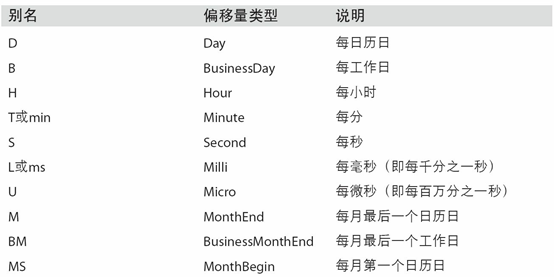


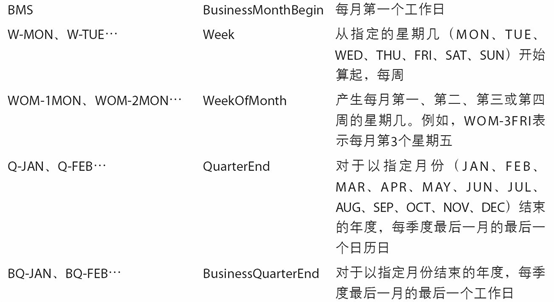

date_range默认会保留起始和结束时间戳的时间信息（如果有的话）：

In [52]:
pd.date_range('2012-05-02 12:56:31', periods=5)

DatetimeIndex(['2012-05-02 12:56:31', '2012-05-03 12:56:31',
               '2012-05-04 12:56:31', '2012-05-05 12:56:31',
               '2012-05-06 12:56:31'],
              dtype='datetime64[ns]', freq='D')

有时，虽然起始和结束日期带有时间信息，但你希望产生一组被规范化（normalize）到午夜的时间戳。normalize选项即可实现该功能：

In [53]:
pd.date_range('2012-05-02 12:56:31', periods=5, normalize=True)

DatetimeIndex(['2012-05-02', '2012-05-03', '2012-05-04', '2012-05-05',
               '2012-05-06'],
              dtype='datetime64[ns]', freq='D')

#### #频率和日期偏移量
pandas中的频率是由一个基础频率（base frequency）和一个乘数组成的。基础频率通常以一个字符串别名表示，比如"M"表示每月，"H"表示每小时。对于每个基础频率，都有一个被称为日期偏移量（date offset）的对象与之对应。

表11-4 时间序列的基础频率
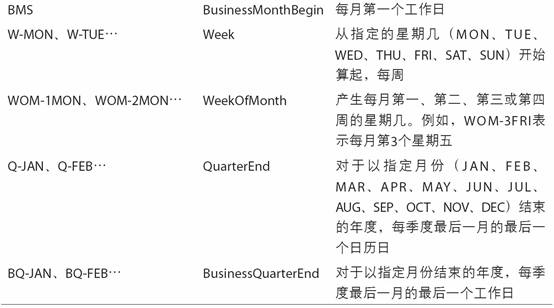

#### #WOM日期
WOM（Week Of Month）是一种非常实用的频率类，它以WOM开头。它使你能获得诸如“每月第3个星期五”之类的日期：

In [54]:
rng = pd.date_range('2012-01-01', '2012-09-01', freq='WOM-3FRI')
list(rng)

[Timestamp('2012-01-20 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-02-17 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-03-16 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-04-20 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-05-18 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-06-15 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-07-20 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-08-17 00:00:00', freq='WOM-3FRI')]

#### #移动（超前和滞后）数据
移动（shifting）指的是沿着时间轴将数据前移或后移。Series和DataFrame都有一个shift方法用于执行单纯的前移或后移操作，保持索引不变：

In [56]:
ts = pd.Series(np.random.randn(4),
                  index=pd.date_range('1/1/2000', periods=4, freq='M'))
ts

2000-01-31    1.805667
2000-02-29    0.045989
2000-03-31   -0.266011
2000-04-30   -0.648895
Freq: M, dtype: float64

In [57]:
ts.shift(2)

2000-01-31         NaN
2000-02-29         NaN
2000-03-31    1.805667
2000-04-30    0.045989
Freq: M, dtype: float64

In [58]:
ts.shift(-2)

2000-01-31   -0.266011
2000-02-29   -0.648895
2000-03-31         NaN
2000-04-30         NaN
Freq: M, dtype: float64

当我们这样进行移动时，就会在时间序列的前面或后面产生缺失数据。

### 11.5 时期及其算术运算
时期（period）表示的是时间区间，比如数日、数月、数季、数年等。Period类所表示的就是这种数据类型，其构造函数需要用到一个字符串或整数，以及表11-4中的频率：

In [59]:
 p = pd.Period(2007, freq='A-DEC')
p

Period('2007', 'A-DEC')

这里，这个Period对象表示的是从2007年1月1日到2007年12月31日之间的整段时间。只需对Period对象加上或减去一个整数即可达到根据其频率进行位移的效果：

In [60]:
p + 5

Period('2012', 'A-DEC')

In [61]:
p - 2

Period('2005', 'A-DEC')

如果两个Period对象拥有相同的频率，则它们的差就是它们之间的单位数量：

In [62]:
pd.Period('2014', freq='A-DEC') - p

<7 * YearEnds: month=12>

period_range函数可用于创建规则的时期范围：

In [63]:
rng = pd.period_range('2000-01-01', '2000-06-30', freq='M')
rng

PeriodIndex(['2000-01', '2000-02', '2000-03', '2000-04', '2000-05', '2000-06'], dtype='period[M]', freq='M')

PeriodIndex类保存了一组Period，它可以在任何pandas数据结构中被用作轴索引：

In [64]:
pd.Series(np.random.randn(6), index=rng)

2000-01   -0.280818
2000-02    0.904441
2000-03   -3.295479
2000-04    1.793808
2000-05    0.374383
2000-06   -0.459964
Freq: M, dtype: float64

如果你有一个字符串数组，你也可以使用PeriodIndex类：

In [65]:
values = ['2001Q3', '2002Q2', '2003Q1']
index = pd.PeriodIndex(values, freq='Q-DEC')
index

PeriodIndex(['2001Q3', '2002Q2', '2003Q1'], dtype='period[Q-DEC]', freq='Q-DEC')

#### #时期的频率转换
Period和PeriodIndex对象都可以通过其asfreq方法被转换成别的频率。假设我们有一个年度时期，希望将其转换为当年年初或年末的一个月度时期。该任务非常简单：

In [66]:
p = pd.Period('2007', freq='A-DEC')
p

Period('2007', 'A-DEC')

In [67]:
p.asfreq('M', how='start')

Period('2007-01', 'M')

In [68]:
p.asfreq('M', how='end')

Period('2007-12', 'M')

你可以将Period('2007','A-DEC')看做一个被划分为多个月度时期的时间段中的游标。图11-1对此进行了说明。对于一个不以12月结束的财政年度，月度子时期的归属情况就不一样了：

In [69]:
p = pd.Period('2007', freq='A-JUN')
p

Period('2007', 'A-JUN')

In [70]:
p.asfreq('M', 'start')

Period('2006-07', 'M')

In [71]:
p.asfreq('M', 'end')

Period('2007-06', 'M')

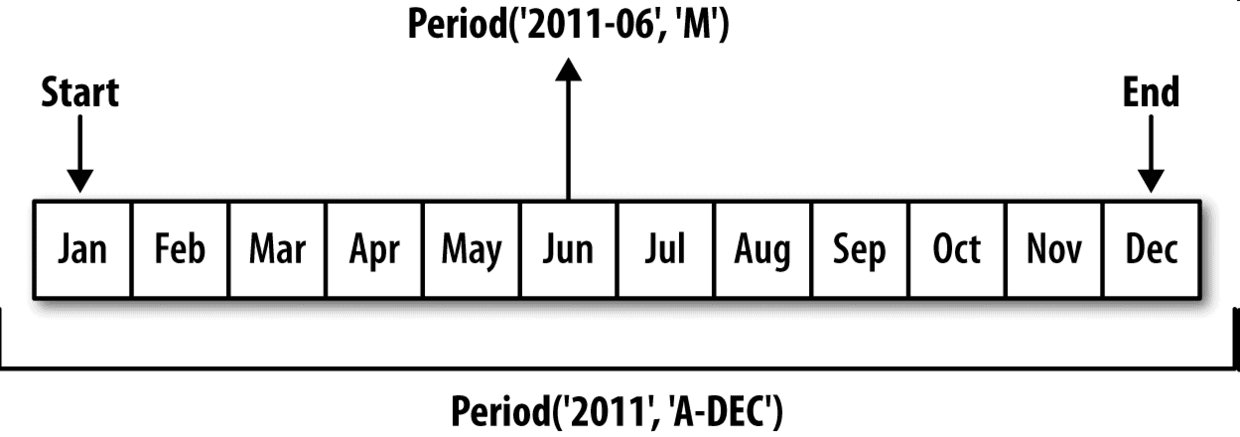
在将高频率转换为低频率时，超时期（superperiod）是由子时期（subperiod）所属的位置决定的。例如，在A-JUN频率中，月份“2007年8月”实际上是属于周期“2008年”的：

In [72]:
p = pd.Period('Aug-2007', 'M')
p.asfreq('A-JUN')

Period('2008', 'A-JUN')

完整的PeriodIndex或TimeSeries的频率转换方式也是如此：

In [73]:
rng = pd.period_range('2006', '2009', freq='A-DEC')
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ts

2006    1.355647
2007   -0.943393
2008    0.527713
2009   -0.365037
Freq: A-DEC, dtype: float64

In [74]:
ts.asfreq('M', how='start')

2006-01    1.355647
2007-01   -0.943393
2008-01    0.527713
2009-01   -0.365037
Freq: M, dtype: float64

这里，根据年度时期的第一个月，每年的时期被取代为每月的时期。如果我们想要每年的最后一个工作日，我们可以使用“B”频率，并指明想要该时期的末尾：

In [75]:
ts.asfreq('B', how='end')

2006-12-29    1.355647
2007-12-31   -0.943393
2008-12-31    0.527713
2009-12-31   -0.365037
Freq: B, dtype: float64

#### #按季度计算的时期频率
季度型数据在会计、金融等领域中很常见。许多季度型数据都会涉及“财年末”的概念，通常是一年12个月中某月的最后一个日历日或工作日。就这一点来说，时期"2012Q4"根据财年末的不同会有不同的含义。pandas支持12种可能的季度型频率，即Q-JAN到Q-DEC：

In [2]:
p = pd.Period('2012Q4', freq='Q-JAN')
p

Period('2012Q4', 'Q-JAN')

在以1月结束的财年中，2012Q4是从11月到1月（将其转换为日型频率就明白了）。图11-2对此进行了说明：

In [3]:
 p.asfreq('D', 'start')

Period('2011-11-01', 'D')

In [4]:
p.asfreq('D', 'end')

Period('2012-01-31', 'D')

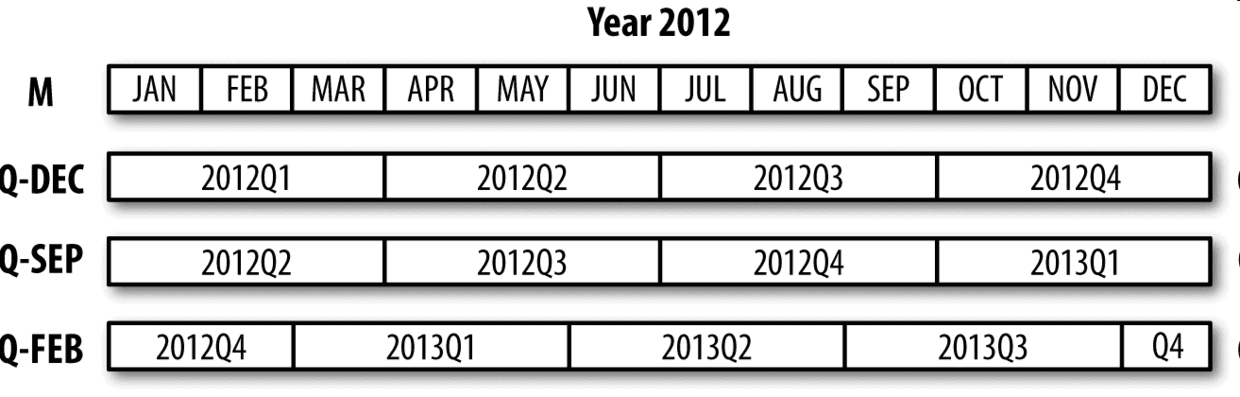
因此，Period之间的算术运算会非常简单。例如，要获取该季度倒数第二个工作日下午4点的时间戳，你可以这样：

In [5]:
p4pm = (p.asfreq('B', 'e') - 1).asfreq('T', 's') + 16 * 60
p4pm

Period('2012-01-30 16:00', 'T')

#### #period_range可用于生成季度型范围。季度型范围的算术运算也跟上面是一样的：

In [6]:
rng = pd.period_range('2011Q3', '2012Q4', freq='Q-JAN')
ts = pd.Series(np.arange(len(rng)), index=rng)
ts

2011Q3    0
2011Q4    1
2012Q1    2
2012Q2    3
2012Q3    4
2012Q4    5
Freq: Q-JAN, dtype: int32

In [7]:
new_rng = (rng.asfreq('B', 'e') - 1).asfreq('T', 's') + 16 * 60
ts.index = new_rng.to_timestamp()
ts

2010-10-28 16:00:00    0
2011-01-28 16:00:00    1
2011-04-28 16:00:00    2
2011-07-28 16:00:00    3
2011-10-28 16:00:00    4
2012-01-30 16:00:00    5
dtype: int32

#### #将Timestamp转换为Period（及其反向过程）
通过使用to_period方法，可以将由时间戳索引的Series和DataFrame对象转换为以时期索引：

In [8]:
rng = pd.date_range('2000-01-01', periods=3, freq='M')
ts = pd.Series(np.random.randn(3), index=rng)
ts

2000-01-31    1.410234
2000-02-29    0.748993
2000-03-31    1.501346
Freq: M, dtype: float64

In [9]:
pts = ts.to_period()
pts

2000-01    1.410234
2000-02    0.748993
2000-03    1.501346
Freq: M, dtype: float64

由于时期指的是非重叠时间区间，因此对于给定的频率，一个时间戳只能属于一个时期。新PeriodIndex的频率默认是从时间戳推断而来的，你也可以指定任何别的频率。结果中允许存在重复时期：

In [15]:
rng = pd.date_range('1/29/2000', periods=6, freq='D')
ts2 = pd.Series(np.random.randn(6), index=rng)
ts2

2000-01-29   -0.302435
2000-01-30   -0.226098
2000-01-31   -1.122260
2000-02-01    0.568269
2000-02-02   -0.840080
2000-02-03    0.369701
Freq: D, dtype: float64

In [16]:
ts2.to_period('M')

2000-01   -0.302435
2000-01   -0.226098
2000-01   -1.122260
2000-02    0.568269
2000-02   -0.840080
2000-02    0.369701
Freq: M, dtype: float64

要转换回时间戳，使用to_timestamp即可：

In [17]:
pts = ts2.to_period()
pts

2000-01-29   -0.302435
2000-01-30   -0.226098
2000-01-31   -1.122260
2000-02-01    0.568269
2000-02-02   -0.840080
2000-02-03    0.369701
Freq: D, dtype: float64

In [19]:
pts.to_timestamp(how='end')

2000-01-29 23:59:59.999999999   -0.302435
2000-01-30 23:59:59.999999999   -0.226098
2000-01-31 23:59:59.999999999   -1.122260
2000-02-01 23:59:59.999999999    0.568269
2000-02-02 23:59:59.999999999   -0.840080
2000-02-03 23:59:59.999999999    0.369701
Freq: D, dtype: float64

#### #通过数组创建PeriodIndex
固定频率的数据集通常会将时间信息分开存放在多个列中。例如，在下面这个宏观经济数据集中，年度和季度就分别存放在不同的列中：

In [20]:
data = pd.read_csv('examples/macrodata.csv')
data.head(5)

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
0,1959.0,1.0,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1,1959.0,2.0,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
2,1959.0,3.0,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
3,1959.0,4.0,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
4,1960.0,1.0,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


In [21]:
data.year

0      1959.0
1      1959.0
2      1959.0
3      1959.0
4      1960.0
        ...  
198    2008.0
199    2008.0
200    2009.0
201    2009.0
202    2009.0
Name: year, Length: 203, dtype: float64

In [22]:
data.quarter

0      1.0
1      2.0
2      3.0
3      4.0
4      1.0
      ... 
198    3.0
199    4.0
200    1.0
201    2.0
202    3.0
Name: quarter, Length: 203, dtype: float64

通过将这些数组以及一个频率传入PeriodIndex，就可以将它们合并成DataFrame的一个索引：

In [23]:
index = pd.PeriodIndex(year=data.year, quarter=data.quarter,
                          freq='Q-DEC')
index

PeriodIndex(['1959Q1', '1959Q2', '1959Q3', '1959Q4', '1960Q1', '1960Q2',
             '1960Q3', '1960Q4', '1961Q1', '1961Q2',
             ...
             '2007Q2', '2007Q3', '2007Q4', '2008Q1', '2008Q2', '2008Q3',
             '2008Q4', '2009Q1', '2009Q2', '2009Q3'],
            dtype='period[Q-DEC]', length=203, freq='Q-DEC')

In [24]:
data.index = index

In [25]:
data.infl

1959Q1    0.00
1959Q2    2.34
1959Q3    2.74
1959Q4    0.27
1960Q1    2.31
          ... 
2008Q3   -3.16
2008Q4   -8.79
2009Q1    0.94
2009Q2    3.37
2009Q3    3.56
Freq: Q-DEC, Name: infl, Length: 203, dtype: float64

In [26]:
data

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
1959Q1,1959.0,1.0,2710.349,1707.4,286.898,470.045,1886.9,28.980,139.7,2.82,5.8,177.146,0.00,0.00
1959Q2,1959.0,2.0,2778.801,1733.7,310.859,481.301,1919.7,29.150,141.7,3.08,5.1,177.830,2.34,0.74
1959Q3,1959.0,3.0,2775.488,1751.8,289.226,491.260,1916.4,29.350,140.5,3.82,5.3,178.657,2.74,1.09
1959Q4,1959.0,4.0,2785.204,1753.7,299.356,484.052,1931.3,29.370,140.0,4.33,5.6,179.386,0.27,4.06
1960Q1,1960.0,1.0,2847.699,1770.5,331.722,462.199,1955.5,29.540,139.6,3.50,5.2,180.007,2.31,1.19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2008Q3,2008.0,3.0,13324.600,9267.7,1990.693,991.551,9838.3,216.889,1474.7,1.17,6.0,305.270,-3.16,4.33
2008Q4,2008.0,4.0,13141.920,9195.3,1857.661,1007.273,9920.4,212.174,1576.5,0.12,6.9,305.952,-8.79,8.91
2009Q1,2009.0,1.0,12925.410,9209.2,1558.494,996.287,9926.4,212.671,1592.8,0.22,8.1,306.547,0.94,-0.71
2009Q2,2009.0,2.0,12901.504,9189.0,1456.678,1023.528,10077.5,214.469,1653.6,0.18,9.2,307.226,3.37,-3.19


### 11.6 重采样及频率转换
重采样（resampling）指的是将时间序列从一个频率转换到另一个频率的处理过程。将高频率数据聚合到低频率称为降采样（downsampling），而将低频率数据转换到高频率则称为升采样（upsampling）。并不是所有的重采样都能被划分到这两个大类中。例如，将W-WED（每周三）转换为W-FRI既不是降采样也不是升采样。

pandas对象都带有一个resample方法，它是各种频率转换工作的主力函数。resample有一个类似于groupby的API，调用resample可以分组数据，然后会调用一个聚合函数：

In [27]:
rng = pd.date_range('2000-01-01', periods=100, freq='D')
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ts

2000-01-01    0.347083
2000-01-02    1.658987
2000-01-03   -0.410540
2000-01-04    0.063437
2000-01-05    1.459736
                ...   
2000-04-05   -0.593762
2000-04-06   -0.444051
2000-04-07   -1.304245
2000-04-08    0.133973
2000-04-09    1.362805
Freq: D, Length: 100, dtype: float64

In [28]:
ts.resample('M').mean()

2000-01-31    0.183833
2000-02-29   -0.240412
2000-03-31    0.435522
2000-04-30    0.275656
Freq: M, dtype: float64

In [29]:
ts.resample('M', kind='period').mean()

2000-01    0.183833
2000-02   -0.240412
2000-03    0.435522
2000-04    0.275656
Freq: M, dtype: float64

resample是一个灵活高效的方法，可用于处理非常大的时间序列。我将通过一系列的示例说明其用法。表11-5总结它的一些选项。

表11-5 resample方法的参数
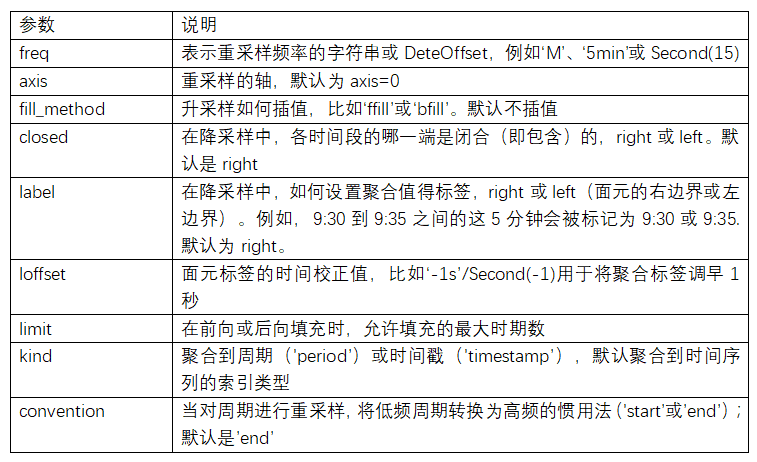

#### #降采样
将数据聚合到规律的低频率是一件非常普通的时间序列处理任务。待聚合的数据不必拥有固定的频率，期望的频率会自动定义聚合的面元边界，这些面元用于将时间序列拆分为多个片段。例如，要转换到月度频率（'M'或'BM'），数据需要被划分到多个单月时间段中。各时间段都是半开放的。一个数据点只能属于一个时间段，所有时间段的并集必须能组成整个时间帧。在用resample对数据进行降采样时，需要考虑两样东西：

- 各区间哪边是闭合的。
- 如何标记各个聚合面元，用区间的开头还是末尾。

为了说明，我们来看一些“1分钟”数据：

In [30]:
rng = pd.date_range('2000-01-01', periods=12, freq='T')
ts = pd.Series(np.arange(12), index=rng)
ts

2000-01-01 00:00:00     0
2000-01-01 00:01:00     1
2000-01-01 00:02:00     2
2000-01-01 00:03:00     3
2000-01-01 00:04:00     4
2000-01-01 00:05:00     5
2000-01-01 00:06:00     6
2000-01-01 00:07:00     7
2000-01-01 00:08:00     8
2000-01-01 00:09:00     9
2000-01-01 00:10:00    10
2000-01-01 00:11:00    11
Freq: T, dtype: int32

假设你想要通过求和的方式将这些数据聚合到“5分钟”块中：

In [31]:
ts.resample('5min', closed='right').sum()

1999-12-31 23:55:00     0
2000-01-01 00:00:00    15
2000-01-01 00:05:00    40
2000-01-01 00:10:00    11
Freq: 5T, dtype: int32

传入的频率将会以“5分钟”的增量定义面元边界。默认情况下，面元的右边界是包含的，因此00:00到00:05的区间中是包含00:05的。传入closed='left'会让区间以左边界闭合：

In [33]:
ts.resample('5min', closed='left').sum()

2000-01-01 00:00:00    10
2000-01-01 00:05:00    35
2000-01-01 00:10:00    21
Freq: 5T, dtype: int32

如你所见，最终的时间序列是以各面元右边界的时间戳进行标记的。传入label='right'即可用面元的邮编界对其进行标记：

In [34]:
ts.resample('5min', closed='right', label='right').sum()

2000-01-01 00:00:00     0
2000-01-01 00:05:00    15
2000-01-01 00:10:00    40
2000-01-01 00:15:00    11
Freq: 5T, dtype: int32

图11-3说明了“1分钟”数据被转换为“5分钟”数据的处理过程。
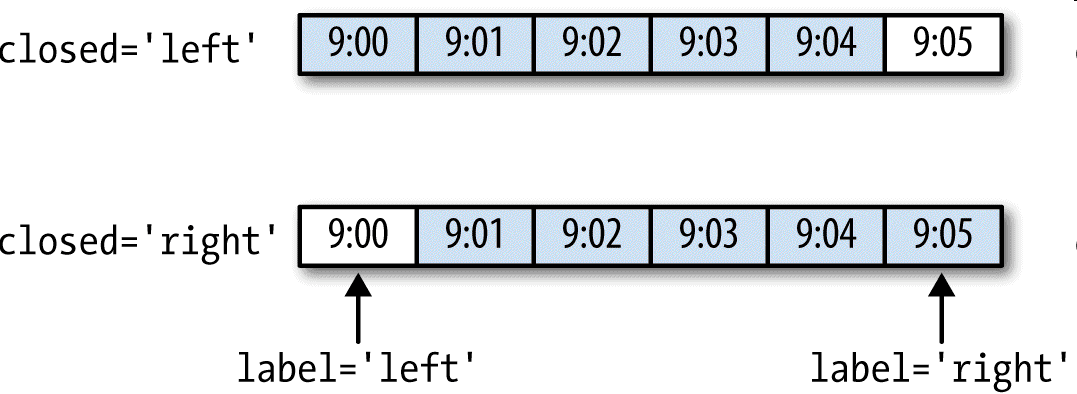

最后，你可能希望对结果索引做一些位移，比如从右边界减去一秒以便更容易明白该时间戳到底表示的是哪个区间。只需通过loffset设置一个字符串或日期偏移量即可实现这个目的：

In [35]:
ts.resample('5min', closed='right',
           label='right', loffset='-1s').sum()

1999-12-31 23:59:59     0
2000-01-01 00:04:59    15
2000-01-01 00:09:59    40
2000-01-01 00:14:59    11
Freq: 5T, dtype: int32

#### #OHLC重采样
金融领域中有一种无所不在的时间序列聚合方式，即计算各面元的四个值：第一个值（open，开盘）、最后一个值（close，收盘）、最大值（high，最高）以及最小值（low，最低）。传入how='ohlc'即可得到一个含有这四种聚合值的DataFrame。整个过程很高效，只需一次扫描即可计算出结果：

In [36]:
ts.resample('5min').ohlc()

,open,high,low,close
2000-01-01 00:00:00,0,4,0,4
2000-01-01 00:05:00,5,9,5,9
2000-01-01 00:10:00,10,11,10,11


#### #升采样和插值:略

#### #通过时期进行重采样
对那些使用时期索引的数据进行重采样与时间戳很像：

In [37]:
frame = pd.DataFrame(np.random.randn(24, 4),
                         index=pd.period_range('1-2000', '12-2001',
                                               freq='M'),
                         columns=['Colorado', 'Texas', 'New York', 'Ohio'])

frame[:5]

,Colorado,Texas,New York,Ohio
2000-01,1.070017,0.554060,0.251364,0.729270
2000-02,-2.336510,0.018766,0.418886,2.129378
2000-03,-1.072387,1.540346,-1.226703,0.215499
2000-04,1.064710,0.516018,-2.821583,1.994006
2000-05,1.296354,-0.694450,1.345776,-1.047353


In [38]:
annual_frame = frame.resample('A-DEC').mean()
annual_frame

,Colorado,Texas,New York,Ohio
2000,0.134162,0.510359,-0.150877,0.122195
2001,-0.474860,-0.289494,0.373411,0.156611


In [39]:
annual_frame1 = frame.resample('A-DEC').max()
annual_frame1

,Colorado,Texas,New York,Ohio
2000,1.296354,1.927954,1.345776,2.129378
2001,0.901850,1.206849,1.508162,1.067021


### 11.7 移动窗口函数:略

## pandas高级功能
### 12.1 分类数据
这一节介绍的是pandas的分类类型。我会向你展示通过使用它，提高性能和内存的使用率。我还会介绍一些在统计和机器学习中使用分类数据的工具。
#### #背景和目的
表中的一列通常会有重复的包含不同值的小集合的情况。我们已经学过了unique和value_counts，它们可以从数组提取出不同的值，并分别计算频率：

In [2]:
import numpy as np; import pandas as pd
values = pd.Series(['apple', 'orange', 'apple',
                     'apple'] * 2)
values

0     apple
1    orange
2     apple
3     apple
4     apple
5    orange
6     apple
7     apple
dtype: object

In [3]:
pd.unique(values)

array(['apple', 'orange'], dtype=object)

In [6]:
pd.value_counts(values)

0    6
1    2
dtype: int64

许多数据系统（数据仓库、统计计算或其它应用）都发展出了特定的表征重复值的方法，以进行高效的存储和计算。在数据仓库中，最好的方法是使用所谓的包含不同值的维表(Dimension Table)，将主要的参数存储为引用维表整数键：

In [5]:
values = pd.Series([0, 1, 0, 0] * 2)
dim = pd.Series(['apple', 'orange'])

In [7]:
values

0    0
1    1
2    0
3    0
4    0
5    1
6    0
7    0
dtype: int64

In [8]:
dim

0     apple
1    orange
dtype: object

可以使用take方法存储原始的字符串Series：

In [9]:
dim.take(values)

0     apple
1    orange
0     apple
0     apple
0     apple
1    orange
0     apple
0     apple
dtype: object

这种用整数表示的方法称为分类或字典编码表示法。不同值得数组称为分类、字典或数据级。本书中，我们使用分类的说法。表示分类的整数值称为分类编码或简单地称为编码。

分类表示可以在进行分析时大大的提高性能。你也可以在保持编码不变的情况下，对分类进行转换。一些相对简单的转变例子包括：

- 重命名分类。
- 加入一个新的分类，不改变已经存在的分类的顺序或位置。

#### #pandas的分类类型
pandas有一个特殊的分类类型，用于保存使用整数分类表示法的数据。看一个之前的Series例子：

In [10]:
fruits = ['apple', 'orange', 'apple', 'apple'] * 2
N = len(fruits)

df = pd.DataFrame({'fruit': fruits,
                      'basket_id': np.arange(N),
                       'count': np.random.randint(3, 15, size=N),
                       'weight': np.random.uniform(0, 4, size=N)},
                      columns=['basket_id', 'fruit', 'count', 'weight'])

df

,basket_id,fruit,count,weight
0,0,apple,5,2.907685
1,1,orange,12,1.310710
2,2,apple,8,2.448805
3,3,apple,4,2.961342
4,4,apple,3,1.631008
5,5,orange,8,1.389229
6,6,apple,5,3.980318
7,7,apple,9,0.727955


这里，df['fruit']是一个Python字符串对象的数组。我们可以通过调用它，将它转变为分类：

In [11]:
df['fruit']

0     apple
1    orange
2     apple
3     apple
4     apple
5    orange
6     apple
7     apple
Name: fruit, dtype: object

In [12]:
fruit_cat = df['fruit'].astype('category')
fruit_cat

0     apple
1    orange
2     apple
3     apple
4     apple
5    orange
6     apple
7     apple
Name: fruit, dtype: category
Categories (2, object): [apple, orange]

fruit_cat的值不是NumPy数组，而是一个pandas.Categorical实例：

In [13]:
c = fruit_cat.values
type(c)

pandas.core.arrays.categorical.Categorical

分类对象有categories和codes属性：

In [14]:
c.categories

Index(['apple', 'orange'], dtype='object')

In [15]:
c.codes

array([0, 1, 0, 0, 0, 1, 0, 0], dtype=int8)

你可将DataFrame的列通过分配转换结果，转换为分类：

In [16]:
df['fruit'] = df['fruit'].astype('category')
df.fruit

0     apple
1    orange
2     apple
3     apple
4     apple
5    orange
6     apple
7     apple
Name: fruit, dtype: category
Categories (2, object): [apple, orange]

你还可以从其它Python序列直接创建pandas.Categorical：

In [17]:
my_categories = pd.Categorical(['foo', 'bar', 'baz', 'foo', 'bar'])
my_categories

[foo, bar, baz, foo, bar]
Categories (3, object): [bar, baz, foo]

如果你已经从其它源获得了分类编码，你还可以使用from_codes构造器：

In [18]:
categories = ['foo', 'bar', 'baz']
codes = [0, 1, 2, 0, 0, 1]

In [19]:
my_cats_2 = pd.Categorical.from_codes(codes, categories)
my_cats_2

[foo, bar, baz, foo, foo, bar]
Categories (3, object): [foo, bar, baz]

与显示指定不同，分类变换不认定指定的分类顺序。因此取决于输入数据的顺序，categories数组的顺序会不同。当使用from_codes或其它的构造器时，你可以指定分类一个有意义的顺序：

In [20]:
ordered_cat = pd.Categorical.from_codes(codes, categories,
                                            ordered=True)

ordered_cat

[foo, bar, baz, foo, foo, bar]
Categories (3, object): [foo < bar < baz]

输出[foo < bar < baz]指明‘foo’位于‘bar’的前面，以此类推。无序的分类实例可以通过as_ordered排序：

In [21]:
my_cats_2.as_ordered()

[foo, bar, baz, foo, foo, bar]
Categories (3, object): [foo < bar < baz]

最后要注意，分类数据不需要字符串，尽管我仅仅展示了字符串的例子。分类数组可以包括任意不可变类型。

#### #用分类进行计算
与非编码版本（比如字符串数组）相比，使用pandas的Categorical有些类似。某些pandas组件，比如groupby函数，更适合进行分类。还有一些函数可以使用有序标志位。

来看一些随机的数值数据，使用pandas.qcut面元函数。它会返回pandas.Categorical，我们之前使用过pandas.cut，但没解释分类是如何工作的：

In [22]:
np.random.seed(12345)
draws = np.random.randn(1000)
draws[:5]

array([-0.20470766,  0.47894334, -0.51943872, -0.5557303 ,  1.96578057])

计算这个数据的分位面元，提取一些统计信息：

In [23]:
bins = pd.qcut(draws, 4)
bins

[(-0.684, -0.0101], (-0.0101, 0.63], (-0.684, -0.0101], (-0.684, -0.0101], (0.63, 3.928], ..., (-0.0101, 0.63], (-0.684, -0.0101], (-2.9499999999999997, -0.684], (-0.0101, 0.63], (0.63, 3.928]]
Length: 1000
Categories (4, interval[float64]): [(-2.9499999999999997, -0.684] < (-0.684, -0.0101] < (-0.0101, 0.63] < (0.63, 3.928]]

虽然有用，确切的样本分位数与分位的名称相比，不利于生成汇总。我们可以使用labels参数qcut，实现目的：

In [24]:
bins = pd.qcut(draws, 4, labels=['Q1', 'Q2', 'Q3', 'Q4'])
bins

[Q2, Q3, Q2, Q2, Q4, ..., Q3, Q2, Q1, Q3, Q4]
Length: 1000
Categories (4, object): [Q1 < Q2 < Q3 < Q4]

In [25]:
bins.codes[:10]

array([1, 2, 1, 1, 3, 3, 2, 2, 3, 3], dtype=int8)

加上标签的面元分类不包含数据面元边界的信息，因此可以使用groupby提取一些汇总信息：

In [26]:
bins = pd.Series(bins, name='quartile')

results = (pd.Series(draws)
           .groupby(bins)
              .agg(['count', 'min', 'max'])
              .reset_index())

results

,quartile,count,min,max
0,Q1,250,-2.949343,-0.685484
1,Q2,250,-0.683066,-0.010115
2,Q3,250,-0.010032,0.628894
3,Q4,250,0.634238,3.927528


分位数列保存了原始的面元分类信息，包括排序：

In [27]:
results['quartile']

0    Q1
1    Q2
2    Q3
3    Q4
Name: quartile, dtype: category
Categories (4, object): [Q1 < Q2 < Q3 < Q4]

#### #用分类提高性能
如果你是在一个特定数据集上做大量分析，将其转换为分类可以极大地提高效率。DataFrame列的分类使用的内存通常少的多。来看一些包含一千万元素的Series，和一些不同的分类：

In [28]:
N = 10000000
draws = pd.Series(np.random.randn(N))
labels = pd.Series(['foo', 'bar', 'baz', 'qux'] * (N // 4))

现在，将标签转换为分类：

In [29]:
categories = labels.astype('category')

这时，可以看到标签使用的内存远比分类多：

In [30]:
labels.memory_usage()

80000128

In [31]:
categories.memory_usage()

10000320

转换为分类不是没有代价的，但这是一次性的代价：

In [32]:
%time _ = labels.astype('category')

Wall time: 486 ms


GroupBy使用分类操作明显更快，是因为底层的算法使用整数编码数组，而不是字符串数组。
#### #分类方法
包含分类数据的Series有一些特殊的方法，类似于Series.str字符串方法。它还提供了方便的分类和编码的使用方法。看下面的Series：

In [33]:
s = pd.Series(['a', 'b', 'c', 'd'] * 2)
cat_s = s.astype('category')
cat_s

0    a
1    b
2    c
3    d
4    a
5    b
6    c
7    d
dtype: category
Categories (4, object): [a, b, c, d]

特别的cat属性提供了分类方法的入口：

In [34]:
cat_s.cat.codes

0    0
1    1
2    2
3    3
4    0
5    1
6    2
7    3
dtype: int8

假设我们知道这个数据的实际分类集，超出了数据中的四个值。我们可以使用set_categories方法改变它们：

In [38]:
actual_categories = ['a', 'b', 'c', 'd', 'e']
cat_s2 = cat_s.cat.set_categories(actual_categories)
cat_s2

0    a
1    b
2    c
3    d
4    a
5    b
6    c
7    d
dtype: category
Categories (5, object): [a, b, c, d, e]

虽然数据看起来没变，新的分类将反映在它们的操作中。例如，如果有的话，value_counts表示分类：

In [39]:
cat_s.value_counts()

d    2
c    2
b    2
a    2
dtype: int64

In [40]:
cat_s2.value_counts()

d    2
c    2
b    2
a    2
e    0
dtype: int64

在大数据集中，分类经常作为节省内存和高性能的便捷工具。过滤完大DataFrame或Series之后，许多分类可能不会出现在数据中。我们可以使用remove_unused_categories方法删除没看到的分类：

In [41]:
cat_s3 = cat_s[cat_s.isin(['a', 'b'])]
cat_s3

0    a
1    b
4    a
5    b
dtype: category
Categories (4, object): [a, b, c, d]

In [42]:
cat_s3.cat.remove_unused_categories()

0    a
1    b
4    a
5    b
dtype: category
Categories (2, object): [a, b]

表12-1列出了可用的分类方法。
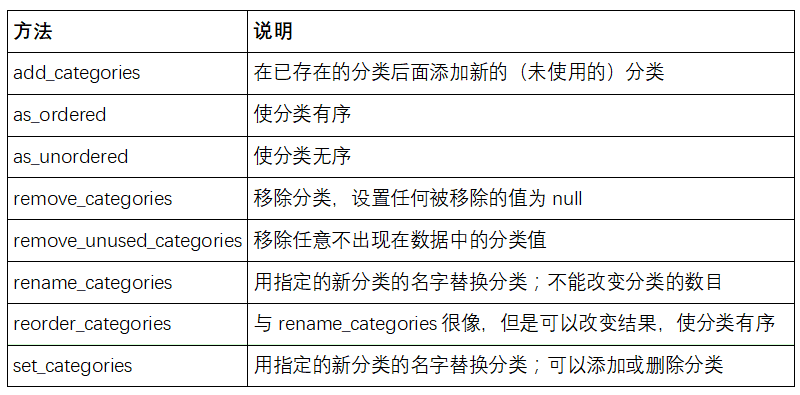

#### #为建模创建虚拟变量
当你使用统计或机器学习工具时，通常会将分类数据转换为虚拟变量，也称为one-hot编码。这包括创建一个不同类别的列的DataFrame；这些列包含给定分类的1s，其它为0。

看前面的例子：

In [44]:
cat_s = pd.Series(['a', 'b', 'c', 'd'] * 2, dtype='category')

前面的第7章提到过，pandas.get_dummies函数可以转换这个分类数据为包含虚拟变量的DataFrame：

In [45]:
pd.get_dummies(cat_s)

,a,b,c,d
0,1,0,0,0
1,0,1,0,0
2,0,0,1,0
3,0,0,0,1
4,1,0,0,0
5,0,1,0,0
6,0,0,1,0
7,0,0,0,1


### 12.2 GroupBy高级应用
尽管我们在第10章已经深度学习了Series和DataFrame的Groupby方法，还有一些方法也是很有用的。
#### #分组转换和“解封”GroupBy
在第10章，我们在分组操作中学习了apply方法，进行转换。还有另一个transform方法，它与apply很像，但是对使用的函数有一定限制：

- 它可以产生向分组形状广播标量值
- 它可以产生一个和输入组形状相同的对象
- 它不能修改输入

来看一个简单的例子：

In [46]:
df = pd.DataFrame({'key': ['a', 'b', 'c'] * 4,
                       'value': np.arange(12.)})
df

,key,value
0,a,0.0
1,b,1.0
2,c,2.0
3,a,3.0
4,b,4.0
5,c,5.0
6,a,6.0
7,b,7.0
8,c,8.0
9,a,9.0


按键进行分组：

In [47]:
g = df.groupby('key').value
g.mean()

key
a    4.5
b    5.5
c    6.5
Name: value, dtype: float64

假设我们想产生一个和df['value']形状相同的Series，但值替换为按键分组的平均值。我们可以传递函数lambda x: x.mean()进行转换：

In [48]:
 g.transform(lambda x: x.mean())

0     4.5
1     5.5
2     6.5
3     4.5
4     5.5
5     6.5
6     4.5
7     5.5
8     6.5
9     4.5
10    5.5
11    6.5
Name: value, dtype: float64

对于内置的聚合函数，我们可以传递一个字符串假名作为GroupBy的agg方法：

In [49]:
g.transform('mean')

0     4.5
1     5.5
2     6.5
3     4.5
4     5.5
5     6.5
6     4.5
7     5.5
8     6.5
9     4.5
10    5.5
11    6.5
Name: value, dtype: float64

与apply类似，transform的函数会返回Series，但是结果必须与输入大小相同。举个例子，我们可以用lambda函数将每个分组乘以2：

In [50]:
g.transform(lambda x: x * 2)

0      0.0
1      2.0
2      4.0
3      6.0
4      8.0
5     10.0
6     12.0
7     14.0
8     16.0
9     18.0
10    20.0
11    22.0
Name: value, dtype: float64

再举一个复杂的例子，我们可以计算每个分组的降序排名：

In [51]:
g.transform(lambda x: x.rank(ascending=False))

0     4.0
1     4.0
2     4.0
3     3.0
4     3.0
5     3.0
6     2.0
7     2.0
8     2.0
9     1.0
10    1.0
11    1.0
Name: value, dtype: float64

### 13.1 pandas与模型代码的接口

模型开发的通常工作流是使用pandas进行数据加载和清洗，然后切换到建模库进行建模。开发模型的重要一环是机器学习中的“特征工程”。它可以描述从原始数据集中提取信息的任何数据转换或分析，这些数据集可能在建模中有用。本书中学习的数据聚合和GroupBy工具常用于特征工程中。

优秀的特征工程超出了本书的范围，我会尽量直白地介绍一些用于数据操作和建模切换的方法。

pandas与其它分析库通常是靠NumPy的数组联系起来的。将DataFrame转换为NumPy数组，可以使用.values属性：

In [2]:
import pandas as pd

import numpy as np

data = pd.DataFrame({
      'x0': [1, 2, 3, 4, 5],
      'x1': [0.01, -0.01, 0.25, -4.1, 0.],
      'y': [-1.5, 0., 3.6, 1.3, -2.]})
data

,x0,x1,y
0,1,0.01,-1.5
1,2,-0.01,0.0
2,3,0.25,3.6
3,4,-4.10,1.3
4,5,0.00,-2.0


In [3]:
data.columns

Index(['x0', 'x1', 'y'], dtype='object')

In [4]:
data.values

array([[ 1.  ,  0.01, -1.5 ],
       [ 2.  , -0.01,  0.  ],
       [ 3.  ,  0.25,  3.6 ],
       [ 4.  , -4.1 ,  1.3 ],
       [ 5.  ,  0.  , -2.  ]])

要转换回DataFrame，可以传递一个二维ndarray，可带有列名：

In [5]:
df2 = pd.DataFrame(data.values, columns=['one', 'two', 'three'])
df2

,one,two,three
0,1.0,0.01,-1.5
1,2.0,-0.01,0.0
2,3.0,0.25,3.6
3,4.0,-4.10,1.3
4,5.0,0.00,-2.0


>笔记：最好当数据是均匀的时候使用.values属性。例如，全是数值类型。如果数据是不均匀的，结果会是Python对象的ndarray：

In [6]:
df3 = data.copy()

df3['strings'] = ['a', 'b', 'c', 'd', 'e']
df3

,x0,x1,y,strings
0,1,0.01,-1.5,a
1,2,-0.01,0.0,b
2,3,0.25,3.6,c
3,4,-4.10,1.3,d
4,5,0.00,-2.0,e


In [7]:
df3.values

array([[1, 0.01, -1.5, 'a'],
       [2, -0.01, 0.0, 'b'],
       [3, 0.25, 3.6, 'c'],
       [4, -4.1, 1.3, 'd'],
       [5, 0.0, -2.0, 'e']], dtype=object)

对于一些模型，你可能只想使用列的子集。我建议你使用loc，用values作索引：

In [8]:
model_cols = ['x0', 'x1']
data.loc[:, model_cols].values

array([[ 1.  ,  0.01],
       [ 2.  , -0.01],
       [ 3.  ,  0.25],
       [ 4.  , -4.1 ],
       [ 5.  ,  0.  ]])

一些库原生支持pandas，会自动完成工作：从DataFrame转换到NumPy，将模型的参数名添加到输出表的列或Series。其它情况，你可以手工进行“元数据管理”。

在第12章，我们学习了pandas的Categorical类型和pandas.get_dummies函数。假设数据集中有一个非数值列：

In [9]:
data['category'] = pd.Categorical(['a', 'b', 'a', 'a', 'b'],
                                      categories=['a', 'b'])

data

,x0,x1,y,category
0,1,0.01,-1.5,a
1,2,-0.01,0.0,b
2,3,0.25,3.6,a
3,4,-4.10,1.3,a
4,5,0.00,-2.0,b


如果我们想替换category列为虚变量，我们可以创建虚变量，删除category列，然后添加到结果：

In [10]:
dummies = pd.get_dummies(data.category, prefix='category')
data_with_dummies = data.drop('category', axis=1).join(dummies)
data_with_dummies

,x0,x1,y,category_a,category_b
0,1,0.01,-1.5,1,0
1,2,-0.01,0.0,0,1
2,3,0.25,3.6,1,0
3,4,-4.10,1.3,1,0
4,5,0.00,-2.0,0,1


### 13.4 scikit-learn介绍
scikit-learn是一个广泛使用、用途多样的Python机器学习库。它包含多种标准监督和非监督机器学习方法和模型选择和评估、数据转换、数据加载和模型持久化工具。这些模型可以用于分类、聚合、预测和其它任务。

机器学习方面的学习和应用scikit-learn和TensorFlow解决实际问题的线上和纸质资料很多。本节中，我会简要介绍scikit-learn API的风格。

写作此书的时候，scikit-learn并没有和pandas深度结合，但是有些第三方包在开发中。尽管如此，pandas非常适合在模型拟合前处理数据集。

举个例子，我用一个Kaggle竞赛的经典数据集，关于泰坦尼克号乘客的生还率。我们用pandas加载测试和训练数据集：

In [11]:
train = pd.read_csv('datasets/titanic/train.csv')

test = pd.read_csv('datasets/titanic/test.csv')

train[:4]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S


statsmodels和scikit-learn通常不能接收缺失数据，因此我们要查看列是否包含缺失值：

In [12]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [13]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

在统计和机器学习的例子中，根据数据中的特征，一个典型的任务是预测乘客能否生还。模型现在训练数据集中拟合，然后用样本外测试数据集评估。

我想用年龄作为预测值，但是它包含缺失值。缺失数据补全的方法有多种，我用的是一种简单方法，用训练数据集的中位数补全两个表的空值：

In [14]:
impute_value = train['Age'].median()
train['Age'] = train['Age'].fillna(impute_value)
test['Age'] = test['Age'].fillna(impute_value)

现在我们需要指定模型。我增加了一个列IsFemale，作为“Sex”列的编码：

In [15]:
train['IsFemale'] = (train['Sex'] == 'female').astype(int)
test['IsFemale'] = (test['Sex'] == 'female').astype(int)

然后，我们确定一些模型变量，并创建NumPy数组：

In [16]:
predictors = ['Pclass', 'IsFemale', 'Age']
X_train = train[predictors].values
X_test = test[predictors].values
y_train = train['Survived'].values
X_train[:5]

array([[ 3.,  0., 22.],
       [ 1.,  1., 38.],
       [ 3.,  1., 26.],
       [ 1.,  1., 35.],
       [ 3.,  0., 35.]])

我不能保证这是一个好模型，但它的特征都符合。我们用scikit-learn的LogisticRegression模型，创建一个模型实例：

In [17]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

与statsmodels类似，我们可以用模型的fit方法，将它拟合到训练数据：

In [18]:
 model.fit(X_train, y_train)

LogisticRegression()

现在，我们可以用model.predict，对测试数据进行预测：

In [19]:
y_predict = model.predict(X_test)
y_predict[:10]

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0], dtype=int64)